# Weakly-Supervised Text Classification for Estonian Sentiment Analysis

The code for Andreas Pung's Master's Thesis.

# Finding TF-IDF for Estonian Valence Corpus

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

from collections import defaultdict
from collections import Counter

In [ ]:
# Estonian Valency Corpus "sentiment.zip"
!gdown --id 1zxF7P11YGiF1r7gKP750Y_-VdR1LR1j- #sentiment.zip's ID in my personal GDrive folder
!unzip sentiment.zip
!rm -r __MACOSX/
!rm sentiment.zip
!gdown --id 1NXUtbrYZNl9Z-5EUtWpfxz6e8WB-80Qj

Downloading...
From: https://drive.google.com/uc?id=1zxF7P11YGiF1r7gKP750Y_-VdR1LR1j-
To: /content/sentiment.zip
100% 445k/445k [00:00<00:00, 65.4MB/s]
Archive:  sentiment.zip
  inflating: dev.tsv                 
  inflating: test.tsv                
  inflating: train.tsv               
  inflating: __MACOSX/._train.tsv    
Downloading...
From: https://drive.google.com/uc?id=1NXUtbrYZNl9Z-5EUtWpfxz6e8WB-80Qj
To: /content/Valentsisonastik_Eesti Keele Instituut 2014.xlsx
100% 633k/633k [00:00<00:00, 78.2MB/s]


In [ ]:
sents = defaultdict(list)
with open("train.tsv", mode="r", encoding="utf8") as f:
  for row in f:
    _, _, label, text = row.split("\t")
    sents[label].append(text.strip())

In [ ]:
sents.keys()

dict_keys(['neutraalne', 'negatiivne', 'vastuoluline', 'positiivne'])

In [ ]:
sents["neutraalne"][:5] #example of some texts.

['Elavad pildid jõuab Stockholmis kinolinale',
 'Kui riigikogu arutas rohkem kui kümme aastat tagasi esimest korda arsti ja patsiendi suhteid reguleerivat eelnõu, esitati mulle samuti küsimus eutanaasia kohta. Vastasin tookord ja olen ka täna veendunud, et mõistlik oleks kõigepealt luua usalduslik ja selge suhe kõigi muude juhtude tarbeks, kus küsimuse all pole elu või surm. Seejärel tuleb hinnata patsiendiseaduse tegelikke mõjusid ja toimimist ning alles siis jõuda aruteluni, kas ja millistel tingimustel saaksid arst ja patsient või tema esindajad langetada niivõrd tõsise otsuse.',
 'Nüüd tuleks katset korrata 239 vabatahtlikuga ja läbida teadaolev lennuki teekond,siis saadakse saladuse jälile.',
 'Kolmandana kerkis poodiumile norralane Fredrik Rørvik, kes pidi samuti läbima kolm trahviringi. Tema alustas võistlust 13. positsioonilt.',
 'Pulm saab olema võrdlemisi väike – kutsutakse umbes 20 külalist.']

In [ ]:
import requests
def get_est_stopwords(): #finding stopwords

  #words
    r = requests.get(
        'http://datadoi.ee/bitstream/handle/33/78/estonian-stopwords.txt?sequence=1&isAllowed=y')

    r.encoding = "UTF-8"

    stopwords_est = r.text.split()

    return stopwords_est

est_stopwords = get_est_stopwords()

len(est_stopwords)

5025

In [ ]:
# https://www.tutorialguruji.com/python/which-10-words-has-the-highest-tf-idf-value-in-each-document-total/

def highest_tfidf_words(label="positiivne", topn=10):
  tfidf = TfidfVectorizer(stop_words=est_stopwords)
  X_tfidf = tfidf.fit_transform(sents[label]).toarray()
  vocab = tfidf.vocabulary_
  reverse_vocab = {v:k for k,v in vocab.items()}

  feature_names = tfidf.get_feature_names()
  df_tfidf = pd.DataFrame(X_tfidf, columns = feature_names)

  idx = X_tfidf.argsort(axis=1)

  #tfidf_max10 = idx[:,-10:]

  #df_tfidf['top10'] = [[reverse_vocab.get(item) for item in row] for row in tfidf_max10 ]

  #df_tfidf['top10']

  #topn = 100
  global_top10_idx = X_tfidf.max(axis=0).argsort()[-topn:]
  return np.asarray(feature_names)[global_top10_idx]

highest_tfidf_words("neutraalne", 100)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aidu', 'bai', 'emb', 'emba', 'emma', 'emmaks', 'emmal', 'emmale', 'emmalt', 'emmas', 'emmasse', 'emmast', 'ha', 'he', 'heldeke', 'hii', 'hip', 'hoh', 'hä', 'hää', 'ih', 'ii', 'jaa', 'killa', 'kimps', 'kips', 'kirr', 'kirra', 'klu', 'kluu', 'kohva', 'kolla', 'kripa', 'krips', 'kõlk', 'kõlla', 'kõlladi', 'kõrra', 'köki', 'liiri', 'lika', 'likat', 'lutu', 'luutu', 'lõka', 'lõkat', 'lõõri', 'mull', 'mäta', 'möki', 'müh', 'müt', 'müta', 'ne', 'nämm', 'nõka', 'nõksat', 'nühkat', 'piiri', 'piu', 'pup', 'pääri', 'põrra', 'raidu', 'rips', 'sahka', 'sahkadi', 'setme', 'setmed', 'setmega', 'setmeid', 'setmeiks', 'setmeil', 'setmeile', 'setmeilt', 'setmeis', 'setmeisse', 'setmeist', 'setmeks', 'setmel', 'setmele', 'setmelt', 'setmena', 'setmeni', 'setmes', 'setmesse', 'setmest', 'setmeta', 'setmete', 's

array(['maitsele', 'kuninganna', 'teatagi', 'juhtus', 'no', 'kihlatud',
       'karta', 'liikmete', 'mail', 'kahes', 'ministriametil',
       'tagamängija', 'maksavad', 'makse', 'küla', 'võidelnuid',
       'mälestatakse', 'välisvõlg', 'lahti', 'elektrijaamast', 'loode',
       'poemüüja', 'raha', 'vaata', 'küsida', 'saavutada', 'riigile',
       'prints', 'william', '37', 'nädal', 'lapsega', 'pilt', 'kuiv',
       'galerii', 'kadrisandid', 'askeet', 'vabaõhumuuseumis',
       'vabakutselisena', 'elasite', 'külm', 'esmaspäev', 'tähtis',
       'laval', 'hästi', 'nina', 'tõenäoliselt', 'lapsi', 'tead',
       'sünnitab', 'jama', 'venelane', 'vähem', 'tasub',
       'korduskohtumine', 'peokogemused', 'györis', 'pantokraatori',
       'turvameest', 'beebist', 'valguslahendused', 'suurt',
       'korralikult', 'hiina', 'eurolaval', 'kõhubeebiga', 'rahvuse',
       'muusikuid', 'klikkide', 'taimetoidul', 'eesmärki', 'aeg',
       'lastele', 'mõju', 'meeldib', 'esines', 'piletimängus', 'soov

In [ ]:
tfidf_positive = highest_tfidf_words("positiivne", 100)

tfidf_positive

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aidu', 'bai', 'emb', 'emba', 'emma', 'emmaks', 'emmal', 'emmale', 'emmalt', 'emmas', 'emmasse', 'emmast', 'ha', 'he', 'heldeke', 'hii', 'hip', 'hoh', 'hä', 'hää', 'ih', 'ii', 'jaa', 'killa', 'kimps', 'kips', 'kirr', 'kirra', 'klu', 'kluu', 'kohva', 'kolla', 'kripa', 'krips', 'kõlk', 'kõlla', 'kõlladi', 'kõrra', 'köki', 'liiri', 'lika', 'likat', 'lutu', 'luutu', 'lõka', 'lõkat', 'lõõri', 'mull', 'mäta', 'möki', 'müh', 'müt', 'müta', 'ne', 'nämm', 'nõka', 'nõksat', 'nühkat', 'piiri', 'piu', 'pup', 'pääri', 'põrra', 'raidu', 'rips', 'sahka', 'sahkadi', 'setme', 'setmed', 'setmega', 'setmeid', 'setmeiks', 'setmeil', 'setmeile', 'setmeilt', 'setmeis', 'setmeisse', 'setmeist', 'setmeks', 'setmel', 'setmele', 'setmelt', 'setmena', 'setmeni', 'setmes', 'setmesse', 'setmest', 'setmeta', 'setmete', 's

array(['eurot', 'venemaale', 'merkeli', 'huvitavad', 'hästi',
       'motivaator', 'võimsam', 'puhkus', 'vahva', 'saade', 'müüja',
       'poodi', 'röövima', '3d', 'miljonit', 'ootusärevus', 'laul',
       'kaunikene', 'lava', 'ideon', 'argo', 'hädast', 'päästab',
       'loomakaitse', 'dollariga', 'normaalsuse', 'sobib', 'toredad',
       'postimehes', 'pealkirjad', 'muuseumi', 'teadlaste', 'sõna',
       'autorile', 'meeldib', 'loomulikult', 'laske', 'elage', 'otsus',
       'muusikavideotel', 'eelarve', 'afganistanis', 'dicaprio',
       'pushkar', 'tuntud', 'baltoscandal', 'meelestatud', 'koolimineku',
       'tanja', 'aasa', 'kõva', 'poemüüja', 'poemüüjale', 'andma',
       'täpne', 'medali', 'käsi', 'kaasmaalased', 'sõber', 'inimesed',
       'šveits', 'eelkoolis', 'headuses', 'volmer', 'õnneee',
       'pilt1palju', 'kahte', 'jahu', 'kenias', 'ok', 'õige', 'korraga',
       'häid', 'õnne', 'tänapäeva', 'ohjeldamatu', 'pilt', 'hubane',
       'kodundusoskused', 'praktilised', 'ko

In [ ]:
import warnings
warnings.filterwarnings("ignore")
all_highest = []
tfidfs = {}
for label in sents.keys():
  print(label)
  N = 50 #how many TFIDF words to count
  highest = np.flip(highest_tfidf_words(label, 50))
  tfidfs[label] = highest.tolist()
  all_highest += highest.tolist()
  print(" ".join(highest))
  print()

neutraalne
visati suri ongi võtta mõttes lost põhjus asja ämmad 11 absurdi avangardismi keelevahetuse protsenti põhimõtteliselt pinnatuisku osalemiseks kallis edasilükatud vanemapension prismat tegevus sooviks piletimängus esines meeldib mõju lastele aeg eesmärki taimetoidul klikkide muusikuid rahvuse kõhubeebiga eurolaval hiina korralikult suurt valguslahendused beebist turvameest pantokraatori györis peokogemused korduskohtumine tasub vähem venelane jama

negatiivne
naine anna nikkund asi soeta käsib huvitama auklik künanärijad rikkurid unista maapeale jagama joodikud rahu väärid kõrvalehüppeid hoia kiun koma venelane koopia lapsemeelne peletis virise kännud lipakas nutikaks vedeles bussis jalgpalliga kadedad rämpsu rumal debiilne ennekuulmatu sünnitama kade raibe lätlased öudne vahelduseks püha pangakriisi keeruline nede tüssata sünnitamatagi oksendasin veninud

vastuoluline
mets naersin lame myspace paatos 25 perre sünnivad vastutus ilusam printsess naoga uus punkti puhka kuule jal

In [ ]:
tfidfs

{'negatiivne': ['naine',
  'anna',
  'nikkund',
  'asi',
  'soeta',
  'käsib',
  'huvitama',
  'auklik',
  'künanärijad',
  'rikkurid',
  'unista',
  'maapeale',
  'jagama',
  'joodikud',
  'rahu',
  'väärid',
  'kõrvalehüppeid',
  'hoia',
  'kiun',
  'koma',
  'venelane',
  'koopia',
  'lapsemeelne',
  'peletis',
  'virise',
  'kännud',
  'lipakas',
  'nutikaks',
  'vedeles',
  'bussis',
  'jalgpalliga',
  'kadedad',
  'rämpsu',
  'rumal',
  'debiilne',
  'ennekuulmatu',
  'sünnitama',
  'kade',
  'raibe',
  'lätlased',
  'öudne',
  'vahelduseks',
  'püha',
  'pangakriisi',
  'keeruline',
  'nede',
  'tüssata',
  'sünnitamatagi',
  'oksendasin',
  'veninud'],
 'neutraalne': ['visati',
  'suri',
  'ongi',
  'võtta',
  'mõttes',
  'lost',
  'põhjus',
  'asja',
  'ämmad',
  '11',
  'absurdi',
  'avangardismi',
  'keelevahetuse',
  'protsenti',
  'põhimõtteliselt',
  'pinnatuisku',
  'osalemiseks',
  'kallis',
  'edasilükatud',
  'vanemapension',
  'prismat',
  'tegevus',
  'sooviks',
  '

In [ ]:
#checking whether one word is included in only one class - we want class-indicative words only
c = Counter(all_highest)
not_indicative = [pair[0] for pair in c.most_common() if pair[1] != 1]
not_indicative

['venelane', 'rahu']

In [ ]:
#removing words which are included in multiple categories
for cat in tfidfs:
  words = tfidfs[cat]
  for to_remove in not_indicative:
    if to_remove in words:
      words.remove(to_remove)

print(tfidfs)

{'neutraalne': ['visati', 'suri', 'ongi', 'võtta', 'mõttes', 'lost', 'põhjus', 'asja', 'ämmad', '11', 'absurdi', 'avangardismi', 'keelevahetuse', 'protsenti', 'põhimõtteliselt', 'pinnatuisku', 'osalemiseks', 'kallis', 'edasilükatud', 'vanemapension', 'prismat', 'tegevus', 'sooviks', 'piletimängus', 'esines', 'meeldib', 'mõju', 'lastele', 'aeg', 'eesmärki', 'taimetoidul', 'klikkide', 'muusikuid', 'rahvuse', 'kõhubeebiga', 'eurolaval', 'hiina', 'korralikult', 'suurt', 'valguslahendused', 'beebist', 'turvameest', 'pantokraatori', 'györis', 'peokogemused', 'korduskohtumine', 'tasub', 'vähem', 'jama'], 'negatiivne': ['naine', 'anna', 'nikkund', 'asi', 'soeta', 'käsib', 'huvitama', 'auklik', 'künanärijad', 'rikkurid', 'unista', 'maapeale', 'jagama', 'joodikud', 'väärid', 'kõrvalehüppeid', 'hoia', 'kiun', 'koma', 'koopia', 'lapsemeelne', 'peletis', 'virise', 'kännud', 'lipakas', 'nutikaks', 'vedeles', 'bussis', 'jalgpalliga', 'kadedad', 'rämpsu', 'rumal', 'debiilne', 'ennekuulmatu', 'sünnitam

# Finding weak labels for Valency corpus

In [3]:
!pip install snorkel
!pip install estnltk==1.6.9.1b0
import pandas as pd
import numpy as np
import json

from snorkel.labeling import labeling_function
from snorkel.labeling import PandasLFApplier
from snorkel.labeling import LFAnalysis
from snorkel.labeling import LabelingFunction
from snorkel.preprocess import preprocessor
from snorkel.labeling.model import MajorityLabelVoter
from snorkel.labeling.model import LabelModel

from estnltk import Text

     |████████████████████████████████| 103 kB 6.4 MB/s 
     |████████████████████████████████| 5.6 MB 44.2 MB/s 
     |████████████████████████████████| 14.8 MB 30.8 MB/s 
     |████████████████████████████████| 22.3 MB 3.4 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
y

     |████████████████████████████████| 83.1 MB 58 kB/s 
     |████████████████████████████████| 1.5 MB 45.8 MB/s 
     |████████████████████████████████| 965 kB 59.5 MB/s 
     |████████████████████████████████| 749 kB 48.6 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [1]:
# Estonian Valence Corpus "sentiment.zip"
!gdown --id 1zxF7P11YGiF1r7gKP750Y_-VdR1LR1j- #sentiment.zip's ID in my personal GDrive folder
!unzip sentiment.zip
!rm -r __MACOSX/
!rm sentiment.zip
!gdown --id 1NXUtbrYZNl9Z-5EUtWpfxz6e8WB-80Qj #valence lexicon

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1zxF7P11YGiF1r7gKP750Y_-VdR1LR1j-
To: /content/sentiment.zip
100% 445k/445k [00:00<00:00, 117MB/s]
Archive:  sentiment.zip
  inflating: dev.tsv                 
  inflating: test.tsv                
  inflating: train.tsv               
  inflating: __MACOSX/._train.tsv    
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1NXUtbrYZNl9Z-5EUtWpfxz6e8WB-80Qj
To: /content/Valentsisonastik_Eesti Keele Instituut 2014.xlsx
100% 633k/633k [00:00<00:00, 127MB/s]


In [4]:
valency_dict = dict(pd.read_excel("Valentsisonastik_Eesti Keele Instituut 2014.xlsx", sheet_name="Sheet1", header=None, index_col=None).values)

In [6]:
DISPLAY_ALL_TEXT = True
pd.set_option("display.max_colwidth", 0 if DISPLAY_ALL_TEXT else 150)

Using guides from https://github.com/weakrules/Denoise-multi-weak-sources/blob/master/rules-noisy-labels/IMDB/imdb_rule.py, https://github.com/weakrules/Denoise-multi-weak-sources/blob/master/rules-noisy-labels/Yelp/yelp_rules.py, https://www.snorkel.org/use-cases/01-spam-tutorial, and https://www.kdnuggets.com/2020/07/labelling-data-using-snorkel.html

In [ ]:
DISPLAY_ALL_TEXT = True
pd.set_option("display.max_colwidth", 0 if DISPLAY_ALL_TEXT else 150)

#TRAIN SET
colnames = ["id", "sth", "label", "text"]
df = pd.read_csv("train.tsv", names=colnames, sep='\t', header=None)
df.drop(["sth"], axis=1, inplace=True)

In [ ]:
print(len(df))
df = df[df.label != "vastuoluline"]
print(len(df))

2849
2464


In [ ]:
#DEV SET
df_dev = pd.read_csv("dev.tsv", names=colnames, sep='\t', header=None)
df_dev.drop(["sth"], axis=1, inplace=True)
print(len(df_dev))
df_dev = df_dev[df_dev.label != "vastuoluline"]
print(len(df_dev))

407
352


In [ ]:
ABSTAIN = -1
POS = 1
NEG = 0
NEUT = 2

cats_ind = {"positiivne": POS, "negatiivne": NEG, "neutraalne": NEUT, "teadmata": ABSTAIN}

In [ ]:
df[df.label == "negatiivne"].text

1       Eriliselt kahetsusväärseks pean ma manifesti oponentide etteheidet, et «Humanistliku kristluse manifesti» eesmärk oli rünnata kirikut. See ei olnud kindlasti nii, sest kõik manifesti koostajad ja enamik allakirjutanuid olid kiriku liikmed. Kiriku rünnak iseenda vastu? Tundub absurdne.                                                                                                                                                                                                                  
5       väärid oma nime                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [ ]:
#Text count statistics

print("Train")
for cat in cats_ind:
  print(cat, end=" ")
  print(len(df[df.label==cat]))

print("Dev")
for cat in cats_ind:
  print(cat, end=" ")
  print(len(df_dev[df_dev.label==cat]))

Train
positiivne 612
negatiivne 1347
neutraalne 505
teadmata 0
Dev
positiivne 87
negatiivne 191
neutraalne 74
teadmata 0


## Defining labeling functions

### Keyword LFs

In [ ]:
df

,id,label,text
0,0,neutraalne,Elavad pildid jõuab Stockholmis kinolinale
1,1,negatiivne,"Eriliselt kahetsusväärseks pean ma manifesti oponentide etteheidet, et «Humanistliku kristluse manifesti» eesmärk oli rünnata kirikut. See ei olnud kindlasti nii, sest kõik manifesti koostajad ja enamik allakirjutanuid olid kiriku liikmed. Kiriku rünnak iseenda vastu? Tundub absurdne."
4,4,positiivne,"Ehk oleks mõistlik järgida siin vana rahvatarkust, mille kohaselt tark ei torma? Saame aru, et palgatõus eeldab muudatusi koolide töökorralduses, kuid neid ei tohiks teha kiirustades. On ju võimalik lahendada olukord kahes etapis: esimeses järgus teha ära need muudatused, mis puudutavad õpetajate palgatõusu, ja pärast põhjalikumat arutelu ka need, mis puudutavad koolikorraldust laiemalt."
5,5,negatiivne,väärid oma nime
7,7,negatiivne,"Paljud vajasid tulistamise tõttu arstiabi, edastab BBC."
...,...,...,...
2842,2842,neutraalne,"Seda, kui paljud nende inimeste hulgast, kes rahvaloenduse andmetel ühtegi usku omaks ei tunnista, siiski ennast mõne uskumuse või usulise identiteediga seovad, võiks selgitada täiendava uuringuga. Kindlasti leidub ka selliseid inimesi. Ent sellise info kogumine ei olnud loenduse ülesanne."
2843,2843,neutraalne,"Arvutame pisut. Markusele vajalik protees maksaks 15 000 eurot. See on ühe kesktaseme ministeeriumiametniku aastapalk. Aga kui neid palkasid vabaneks sadu? Lisaks halduskulud, välislähetused… ja nii igal aastal."
2845,2845,positiivne,"Evelin Samuel: ""Kui Oskar läks katsetele, leppisime kokku, et eliitkooli sissesaamine ei ole maailma kõige tähtsam asi."""
2847,2847,positiivne,"Jassi Zahharov: ""Inimene peab ju midagi õppima, ta peab enne surma inimeseks saama."""


In [ ]:
def _tokenize(text):
  #original_text = x.text

  estnltk_text = Text(text)
  estnltk_text.tag_layer(['words'])
  words = [word.text.lower() for word in estnltk_text.words]
  #lemmas = [word[0].lower() for word in estnltk_text.morph_analysis.lemma]

  return words

#Adding tokens field to dataframes
df["tokens"] = df["text"].apply(lambda x: _tokenize(x))

df

,id,label,text,tokens
0,0,neutraalne,Elavad pildid jõuab Stockholmis kinolinale,"[elavad, pildid, jõuab, stockholmis, kinolinale]"
1,1,negatiivne,"Eriliselt kahetsusväärseks pean ma manifesti oponentide etteheidet, et «Humanistliku kristluse manifesti» eesmärk oli rünnata kirikut. See ei olnud kindlasti nii, sest kõik manifesti koostajad ja enamik allakirjutanuid olid kiriku liikmed. Kiriku rünnak iseenda vastu? Tundub absurdne.","[eriliselt, kahetsusväärseks, pean, ma, manifesti, oponentide, etteheidet, ,, et, «, humanistliku, kristluse, manifesti, », eesmärk, oli, rünnata, kirikut, ., see, ei, olnud, kindlasti, nii, ,, sest, kõik, manifesti, koostajad, ja, enamik, allakirjutanuid, olid, kiriku, liikmed, ., kiriku, rünnak, iseenda, vastu, ?, tundub, absurdne, .]"
4,4,positiivne,"Ehk oleks mõistlik järgida siin vana rahvatarkust, mille kohaselt tark ei torma? Saame aru, et palgatõus eeldab muudatusi koolide töökorralduses, kuid neid ei tohiks teha kiirustades. On ju võimalik lahendada olukord kahes etapis: esimeses järgus teha ära need muudatused, mis puudutavad õpetajate palgatõusu, ja pärast põhjalikumat arutelu ka need, mis puudutavad koolikorraldust laiemalt.","[ehk, oleks, mõistlik, järgida, siin, vana, rahvatarkust, ,, mille, kohaselt, tark, ei, torma, ?, saame, aru, ,, et, palgatõus, eeldab, muudatusi, koolide, töökorralduses, ,, kuid, neid, ei, tohiks, teha, kiirustades, ., on, ju, võimalik, lahendada, olukord, kahes, etapis, :, esimeses, järgus, teha, ära, need, muudatused, ,, mis, puudutavad, õpetajate, palgatõusu, ,, ja, pärast, põhjalikumat, arutelu, ka, need, ,, mis, puudutavad, koolikorraldust, laiemalt, .]"
5,5,negatiivne,väärid oma nime,"[väärid, oma, nime]"
7,7,negatiivne,"Paljud vajasid tulistamise tõttu arstiabi, edastab BBC.","[paljud, vajasid, tulistamise, tõttu, arstiabi, ,, edastab, bbc, .]"
...,...,...,...,...
2842,2842,neutraalne,"Seda, kui paljud nende inimeste hulgast, kes rahvaloenduse andmetel ühtegi usku omaks ei tunnista, siiski ennast mõne uskumuse või usulise identiteediga seovad, võiks selgitada täiendava uuringuga. Kindlasti leidub ka selliseid inimesi. Ent sellise info kogumine ei olnud loenduse ülesanne.","[seda, ,, kui, paljud, nende, inimeste, hulgast, ,, kes, rahvaloenduse, andmetel, ühtegi, usku, omaks, ei, tunnista, ,, siiski, ennast, mõne, uskumuse, või, usulise, identiteediga, seovad, ,, võiks, selgitada, täiendava, uuringuga, ., kindlasti, leidub, ka, selliseid, inimesi, ., ent, sellise, info, kogumine, ei, olnud, loenduse, ülesanne, .]"
2843,2843,neutraalne,"Arvutame pisut. Markusele vajalik protees maksaks 15 000 eurot. See on ühe kesktaseme ministeeriumiametniku aastapalk. Aga kui neid palkasid vabaneks sadu? Lisaks halduskulud, välislähetused… ja nii igal aastal.","[arvutame, pisut, ., markusele, vajalik, protees, maksaks, 15, 000, eurot, ., see, on, ühe, kesktaseme, ministeeriumiametniku, aastapalk, ., aga, kui, neid, palkasid, vabaneks, sadu, ?, lisaks, halduskulud, ,, välislähetused, …, ja, nii, igal, aastal, .]"
2845,2845,positiivne,"Evelin Samuel: ""Kui Oskar läks katsetele, leppisime kokku, et eliitkooli sissesaamine ei ole maailma kõige tähtsam asi.""","[evelin, samuel, :, "", kui, oskar, läks, katsetele, ,, leppisime, kokku, ,, et, eliitkooli, sissesaamine, ei, ole, maailma, kõige, tähtsam, asi, ., ""]"
2847,2847,positiivne,"Jassi Zahharov: ""Inimene peab ju midagi õppima, ta peab enne surma inimeseks saama.""","[jassi, zahharov, :, "", inimene, peab, ju, midagi, õppima, ,, ta, peab, enne, surma, inimeseks, saama, ., ""]"


In [ ]:
def _lemmatize(text):
  #original_text = x.text

  estnltk_text = Text(text)
  estnltk_text.tag_layer(['morph_analysis'])
  #words = [word.text.lower() for word in estnltk_text.words]
  lemmas = [word[0].lower() for word in estnltk_text.morph_analysis.lemma]

  return lemmas

#Adding lemmas field to dataframes
df["lemmas"] = df["text"].apply(lambda x: _lemmatize(x))

df

,id,label,text,tokens,lemmas
0,0,neutraalne,Elavad pildid jõuab Stockholmis kinolinale,"[elavad, pildid, jõuab, stockholmis, kinolinale]","[elav, pilt, jõudma, stockholm, kinolina]"
1,1,negatiivne,"Eriliselt kahetsusväärseks pean ma manifesti oponentide etteheidet, et «Humanistliku kristluse manifesti» eesmärk oli rünnata kirikut. See ei olnud kindlasti nii, sest kõik manifesti koostajad ja enamik allakirjutanuid olid kiriku liikmed. Kiriku rünnak iseenda vastu? Tundub absurdne.","[eriliselt, kahetsusväärseks, pean, ma, manifesti, oponentide, etteheidet, ,, et, «, humanistliku, kristluse, manifesti, », eesmärk, oli, rünnata, kirikut, ., see, ei, olnud, kindlasti, nii, ,, sest, kõik, manifesti, koostajad, ja, enamik, allakirjutanuid, olid, kiriku, liikmed, ., kiriku, rünnak, iseenda, vastu, ?, tundub, absurdne, .]","[eriliselt, kahetsusväärne, pidama, mina, manifest, oponent, etteheide, ,, et, «, humanistlik, kristlus, manifest, », eesmärk, olema, ründama, kirik, ., see, ei, olema, kindlasti, nii, ,, sest, kõik, manifest, koostaja, ja, enamik, allakirjutanu, olema, kirik, liige, ., kirik, rünnak, iseenese, vastu, ?, tunduma, absurdne, .]"
4,4,positiivne,"Ehk oleks mõistlik järgida siin vana rahvatarkust, mille kohaselt tark ei torma? Saame aru, et palgatõus eeldab muudatusi koolide töökorralduses, kuid neid ei tohiks teha kiirustades. On ju võimalik lahendada olukord kahes etapis: esimeses järgus teha ära need muudatused, mis puudutavad õpetajate palgatõusu, ja pärast põhjalikumat arutelu ka need, mis puudutavad koolikorraldust laiemalt.","[ehk, oleks, mõistlik, järgida, siin, vana, rahvatarkust, ,, mille, kohaselt, tark, ei, torma, ?, saame, aru, ,, et, palgatõus, eeldab, muudatusi, koolide, töökorralduses, ,, kuid, neid, ei, tohiks, teha, kiirustades, ., on, ju, võimalik, lahendada, olukord, kahes, etapis, :, esimeses, järgus, teha, ära, need, muudatused, ,, mis, puudutavad, õpetajate, palgatõusu, ,, ja, pärast, põhjalikumat, arutelu, ka, need, ,, mis, puudutavad, koolikorraldust, laiemalt, .]","[ehk, olema, mõistlik, järgima, siin, vana, rahvatarkus, ,, mis, kohaselt, tark, ei, tormama, ?, saama, aru, ,, et, palgatõus, eeldama, muudatus, kool, töökorraldus, ,, kuid, see, ei, tohtima, tegema, kiirustama, ., olema, ju, võimalik, lahendama, olukord, kaks, etapp, :, esimene, järk, tegema, ära, see, muudatus, ,, mis, puudutama, õpetaja, palgatõus, ,, ja, pärast, põhjalikum, arutelu, ka, see, ,, mis, puudutama, koolikorraldus, laiemalt, .]"
5,5,negatiivne,väärid oma nime,"[väärid, oma, nime]","[väär, oma, nimi]"
7,7,negatiivne,"Paljud vajasid tulistamise tõttu arstiabi, edastab BBC.","[paljud, vajasid, tulistamise, tõttu, arstiabi, ,, edastab, bbc, .]","[palju, vajama, tulistamine, tõttu, arstiabi, ,, edastama, bbc, .]"
...,...,...,...,...,...
2842,2842,neutraalne,"Seda, kui paljud nende inimeste hulgast, kes rahvaloenduse andmetel ühtegi usku omaks ei tunnista, siiski ennast mõne uskumuse või usulise identiteediga seovad, võiks selgitada täiendava uuringuga. Kindlasti leidub ka selliseid inimesi. Ent sellise info kogumine ei olnud loenduse ülesanne.","[seda, ,, kui, paljud, nende, inimeste, hulgast, ,, kes, rahvaloenduse, andmetel, ühtegi, usku, omaks, ei, tunnista, ,, siiski, ennast, mõne, uskumuse, või, usulise, identiteediga, seovad, ,, võiks, selgitada, täiendava, uuringuga, ., kindlasti, leidub, ka, selliseid, inimesi, ., ent, sellise, info, kogumine, ei, olnud, loenduse, ülesanne, .]","[see, ,, kui, palju, see, inimene, hulgast, ,, kes, rahvaloendus, andmed, üks, usk, oma, ei, tunnistama, ,, siiski, ise, mõni, uskumus, või, usuline, identiteet, siduma, ,, võima, selgitama, täiendav, uuring, ., kindlasti, leiduma, ka, selline, inimene, ., ent, selline, info, kogumine, ei, olema, loendus, ülesanne, .]"
2843,2843,neutraalne,"Arvutame pisut. Markusele vajalik protees maksaks 15 000 eurot. See on ühe kesktaseme ministeeriumiametniku aastapalk. Aga kui neid palkasid vabaneks sadu? Lisaks halduskulud, välislähetused… ja nii igal a

In [ ]:
df_dev["tokens"] = df_dev["text"].apply(lambda x: _tokenize(x))
df_dev["lemmas"] = df_dev["text"].apply(lambda x: _lemmatize(x))

In [ ]:
@preprocessor(memoize=True)
def get_tokens(x):
  return x.tokens, x.lemmas

In [ ]:
def keyword_lookup(x, keywords, label):
  words = x[0]
  lemmas = x[1]
  if any(word in " ".join(words) for word in keywords) or any(word in lemmas for word in keywords):
      return label
  return ABSTAIN


def make_keyword_lf(f_name, keywords, label=POS):
    return LabelingFunction(
        name=f_name,
        f=keyword_lookup,
        resources=dict(keywords=keywords, label=label),
        pre=[get_tokens]
    )

In [ ]:
def flatten(t):
  return [item for sublist in t for item in sublist]

vocabulary = set(flatten(list(df.tokens) + list(df.lemmas)))

#vocabulary

In [ ]:
valency_positive = {key:value for (key,value) in valency_dict.items() if value >= 1}
valency_negative = {key:value for (key,value) in valency_dict.items() if value < 0}
#valency_positive

In [ ]:
good_words = list(valency_positive.keys()) #+ "kõva täpne täpse medal kaasmaalane kaasmaalase sõber sõbra headus ok õige hea häid õnn hubane hubase koolimaja asjalik äge võitja tark targa rahu tubli sallivus kiitus super lahe".split()
bad_words = list(valency_negative.keys()) #+ "veninud oksenda sünnitamata tüssa keeruline keerulise pangakriis õudne raibe kade sünnitama ennekuulmatu debiilne debiilse rumal rämps vedele lipakas kännu virise peletis lapsemeelne lapsemeelse kiun rahu joodik jaga maapeale unista rikkur künanärija auklik nikku niku".split()
neutral_words = vocabulary - set(good_words) - set(bad_words)

keywords_positive = make_keyword_lf("keywords_positive", keywords=good_words, label=POS)
keywords_negative = make_keyword_lf("keywords_negative", keywords=bad_words, label=NEG)
#keywords_neutral = make_keyword_lf("keywords_neutral", keywords=neutral_words, label=NEUT)
#keywords_neutral = make_keyword_lf("keywords_neutral", keywords="vähem tasu korduskohtumi peokogemuse pantokraator turvamees turvameh beebi valguslahenduse suur korraliku hiina eurolava kõhubeebi rahvus muusiku klikkide taimetoit taimetoidu eesmärk eesmärgi aeg aja lastele mõju esine piletimäng soovi tegevus prisma vanemapension edasilükatud osalemise pinnatuisku pinnatuisu põhimõttelise protsenti protsend keelevahetus avangardis absurd ämma asja põhjus mõtte võtta võtma ongi visat viskama".split(), label=NEUT)

## Word2vec LF

In [ ]:
#NB! Do not use lemmatised wordvectors because in the valence lexicon, all the words include different cases (married vs unmarried)
!wget -O vectors.zip https://entu.keeleressursid.ee/api2/file-23893?key=I7G5aC1YgdInohMJjUhi1d5e4jLdhQerZ4ikezz1JEv3B9yuJt9KiPl9lrS87Yz0 #https://entu.keeleressursid.ee/shared/7540/I7G5aC1YgdInohMJjUhi1d5e4jLdhQerZ4ikezz1JEv3B9yuJt9KiPl9lrS87Yz0N
!unzip vectors.zip
#!rm vectors.zip

--2021-11-25 13:25:15--  https://entu.keeleressursid.ee/api2/file-23893?key=I7G5aC1YgdInohMJjUhi1d5e4jLdhQerZ4ikezz1JEv3B9yuJt9KiPl9lrS87Yz0
Resolving entu.keeleressursid.ee (entu.keeleressursid.ee)... 193.40.36.55, 193.40.36.57
Connecting to entu.keeleressursid.ee (entu.keeleressursid.ee)|193.40.36.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/gzip]
Saving to: ‘vectors.zip’

vectors.zip             [     <=>            ] 571.96M  5.91MB/s    in 93s     

2021-11-25 13:26:49 (6.18 MB/s) - ‘vectors.zip’ saved [599740465]

Archive:  vectors.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of vectors.zip or
        vectors.zip.zip, and cannot find vectors.zip.ZIP, period.


In [ ]:
!7z x vectors.zip
#!rm /content/file-23893?key=I7G5aC1YgdInohMJjUhi1d5e4jLdhQerZ4ikezz1JEv3B9yuJt9KiPl9lrS87Yz0


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 599740465 bytes (572 MiB)

Extracting archive: vectors.zip
vectors.zip
Can not open the file as [zip] archive
The file is open as [gzip] archive

--
Path = vectors.zip
Open WARNING: Can not open the file as [zip] archive
Type = gzip
Headers Size = 32

  0% - words.sg.s200.w2v.txt                              1% - words.sg.s200.w2v.txt                              2% - words.sg.s200.w2v.txt                              3% - words.sg.s200.w2v.txt                              4% - words.sg.s200.w2v.

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format("/content/words.sg.s200.w2v.txt", binary=False, unicode_errors='replace')

INFO:textcleaner.py:37: 'pattern' package not found; tag filters are not available for English
INFO:utils_any2vec.py:170: loading projection weights from /content/words.sg.s200.w2v.txt
INFO:utils_any2vec.py:232: loaded (816757, 200) matrix from /content/words.sg.s200.w2v.txt


In [ ]:
len(good_words)

16228

In [ ]:
import numpy as np

def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
       return v
    return v / norm

#Getting all of the normalized wordvectors for good words
good_words_vectors = [normalize(model[word]) for word in list(set(good_words)) if word in model]
good_words_mean = np.mean(good_words_vectors, axis=0)
#good_words_stdev = np.std(good_words_vectors, axis=0)
good_words_mean

array([-0.01454432, -0.08106824,  0.00905416,  0.00366968,  0.0149859 ,
       -0.06038017, -0.04119162, -0.01013901, -0.05806056,  0.0366515 ,
        0.02989163, -0.00478276,  0.00071048, -0.04857459,  0.00337384,
        0.03226314,  0.0367351 ,  0.12830526,  0.01933497,  0.0380418 ,
       -0.04163555, -0.01370813,  0.01993542,  0.01069178,  0.0105438 ,
       -0.01133512, -0.05684579,  0.04500428,  0.05259403,  0.06257845,
        0.01813971, -0.04254993, -0.05869947,  0.06334942, -0.00232369,
       -0.00857316,  0.05914654,  0.01928383, -0.0026858 , -0.0041281 ,
       -0.00777564,  0.00327739, -0.01416455, -0.0405946 ,  0.04235313,
        0.00727339, -0.03358203, -0.02731751,  0.02729367, -0.03486766,
        0.05568438,  0.00180265,  0.00729709,  0.02389923, -0.02158512,
       -0.03748485,  0.04863724,  0.02808112, -0.02571754, -0.02876774,
        0.04660892,  0.02590088, -0.01329075,  0.03207751, -0.02587992,
        0.00632238,  0.04273156, -0.01241102,  0.01794271,  0.01

In [ ]:
distance_sum = 0

for word_vector in good_words_vectors:
  dist = np.linalg.norm(word_vector-good_words_mean) #Eucleidic distance
  distance_sum += dist**2
good_words_std = distance_sum / len(good_words_vectors)
good_words_std

0.689090680050362

In [ ]:
#Getting all of the normalized wordvectors for bad words
bad_words_vectors = [normalize(model[word]) for word in list(set(bad_words)) if word in model]
bad_words_mean = np.mean(bad_words_vectors, axis=0)
#good_words_stdev = np.std(good_words_vectors, axis=0)
good_words_mean

array([-0.01454432, -0.08106824,  0.00905416,  0.00366968,  0.0149859 ,
       -0.06038017, -0.04119162, -0.01013901, -0.05806056,  0.0366515 ,
        0.02989163, -0.00478276,  0.00071048, -0.04857459,  0.00337384,
        0.03226314,  0.0367351 ,  0.12830526,  0.01933497,  0.0380418 ,
       -0.04163555, -0.01370813,  0.01993542,  0.01069178,  0.0105438 ,
       -0.01133512, -0.05684579,  0.04500428,  0.05259403,  0.06257845,
        0.01813971, -0.04254993, -0.05869947,  0.06334942, -0.00232369,
       -0.00857316,  0.05914654,  0.01928383, -0.0026858 , -0.0041281 ,
       -0.00777564,  0.00327739, -0.01416455, -0.0405946 ,  0.04235313,
        0.00727339, -0.03358203, -0.02731751,  0.02729367, -0.03486766,
        0.05568438,  0.00180265,  0.00729709,  0.02389923, -0.02158512,
       -0.03748485,  0.04863724,  0.02808112, -0.02571754, -0.02876774,
        0.04660892,  0.02590088, -0.01329075,  0.03207751, -0.02587992,
        0.00632238,  0.04273156, -0.01241102,  0.01794271,  0.01

In [ ]:
distance_sum = 0
for word_vector in bad_words_vectors:
  dist = np.linalg.norm(word_vector-bad_words_mean)
  distance_sum += dist**2
bad_words_std = distance_sum / len(bad_words_vectors)
bad_words_std

0.652643078807152

In [ ]:
model.most_similar(positive=[bad_words_mean])

[('enesekaitseinstinkt', 0.9222251176834106),
 ('vanglamüürid', 0.917599618434906),
 ('salliksid', 0.9145036935806274),
 ('hingesugulasega', 0.9138808250427246),
 ('kõrvaletõrjutuks', 0.913877010345459),
 ('parasta', 0.9132949709892273),
 ('äkä', 0.9127568006515503),
 ('justtäpselt', 0.9127380847930908),
 ('tapabki', 0.9125010967254639),
 ('miksř', 0.9119820594787598)]

In [ ]:
@labeling_function(pre=[get_tokens])
def word2vec(x):
  words = x[0]

  text_mean = np.mean([normalize(model[word]) for word in words if word in model and word not in est_stopwords], axis=0)

  good_dist = np.linalg.norm(text_mean-good_words_mean)
  bad_dist = np.linalg.norm(text_mean-bad_words_mean)
  MULT = 1.2
  if good_dist < MULT*good_words_std and bad_dist < MULT*bad_words_std:
    return ABSTAIN
  if good_dist < MULT*good_words_std:
    return POS
  if bad_dist < MULT*bad_words_std:
    return NEG
  return NEUT

#word2vec((["hea", "tore", "kuulekas"]))

## Other LFs

In [ ]:
@preprocessor(memoize=True)
def valency_score(x):
  #same approach as in (Pajupuu, 2016)
  words = x.tokens

  score = 0
  negate = False
  for word in words:
    
    word_score = valency_dict.get(word, 0)
    if negate:
      if word_score == 0: #if the word is neutral
        word_score = 1 # will make the following word negative
      score -= word_score
      negate = False
    else:
      score += word_score

    # A  negation  (ei  or  ega)  will  make  the  following  positive  word  negative
    # A  negation  will  make  the  following  negative  word  positive,
    # A negation will make the following neutral word negative
    if word in set(["ei", "ega"]): #negation
      negate = True
  
  return score

#valency_score("siia tule".split())

In [ ]:
@labeling_function(pre=[valency_score])
def valence_prediction(score):
  th = 1
  if score <= -th:
    return NEG
  elif score >= th:
    return POS
  elif score == 0:
    return ABSTAIN
  else:
    return ABSTAIN

In [ ]:
@labeling_function(pre=[get_tokens])
def keywords_neutral_notin(x):
  words = x[0]
  lemmas = x[1]
  if (not any(word in " ".join(words) for word in bad_words) or not any(word in lemmas for word in bad_words)) and \
      (not any(word in " ".join(words) for word in good_words) or not any(word in lemmas for word in good_words)):
      return NEUT
  return ABSTAIN

In [ ]:
@labeling_function(pre=[get_tokens])
def keywords_neutral(x):
  words = x[0]
  lemmas = x[1]
  if all(word in neutral_words for word in words) or all(lemma in neutral_words for lemma in lemmas):
      return NEUT
  return ABSTAIN

In [ ]:
@labeling_function(pre=[get_tokens])
def count_positive_negative(x):
  
  words, lemmas = x
 
  for word in words:
    word_score = valency_dict.get(word, 0)
    if word_score != 0:
      return ABSTAIN
    
  for lemma in lemmas:
    lemma_score = valency_dict.get(lemma, 0)
    if lemma_score != 0:
      return ABSTAIN
  return NEUT
  """
  words, lemmas = x

  score = 0
  pos = 0
  neg = 0
  negate = False
  for word in words:
    
    word_score = valency_dict.get(word, 0)

    if negate:
      if word_score == 0:
        word_score = 1
      neg += 1
      score -= word_score
      negate = False
    else:
      score += word_score
      if word_score < 0:
        neg += 1
      elif word_score > 0:
        pos += 1
    if word in set(["ei", "ega"]): #negation
      negate = True

  if pos == 0 and neg == 0:
    return NEUT
  elif pos > neg:
    return POS
  elif neg > pos:
    return NEG
  else:
    return ABSTAIN
  """
  #return score

In [ ]:
lfs = [valence_prediction, keywords_positive, keywords_negative, count_positive_negative]#, word2vec]#, keywords_neutral]keywords_neutral_notin]

applier = PandasLFApplier(lfs=lfs)
L_train = applier.apply(df=df)
L_dev = applier.apply(df=df_dev)

100%|██████████| 352/352 [00:06<00:00, 55.74it/s]


In [ ]:
LFAnalysis(L=L_train, lfs=lfs).lf_summary(Y=df.label.map(lambda x: cats_ind[x]).to_numpy())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[-1  0  1  2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[-1  0  1  2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[-1  0  1  2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[-1  0  1  2] as keyword args. From version 1.0 (renaming of 0.25) passing these as posit

,j,Polarity,Coverage,Overlaps,Conflicts,Correct,Incorrect,Emp. Acc.
valence_prediction,0,"[0, 1]",0.685065,0.685065,0.501623,1215,473,0.719787
keywords_positive,1,[1],0.796672,0.780032,0.667208,562,1401,0.286296
keywords_negative,2,[0],0.694399,0.691964,0.621347,1073,638,0.627119
count_positive_negative,3,[2],0.265422,0.187500,0.187500,274,380,0.418960


In [ ]:
majority_model = MajorityLabelVoter(cardinality=3) #CARDINALITY!!!
preds_train = majority_model.predict(L=L_train)

In [ ]:
label_model = LabelModel(cardinality=3, verbose=True)
label_model.fit(L_train=L_train, n_epochs=200, log_freq=50, lr=0.01, l2=0.05, seed=123)

majority_acc = majority_model.score(L=L_dev, Y=df_dev.label.map(lambda x: cats_ind[x]).to_numpy(), tie_break_policy="random")["accuracy"]
print(f"{'Majority Vote Accuracy:':<25} {majority_acc * 100:.2f}%")

label_model_acc = label_model.score(L=L_dev, Y=df_dev.label.map(lambda x: cats_ind[x]).to_numpy(), tie_break_policy="random")["accuracy"]
print(f"{'Label Model Accuracy:':<25} {label_model_acc * 100:.2f}%") #BEST 64.20 %

INFO:label_model.py:903: Computing O...
INFO:label_model.py:909: Estimating \mu...


 43%|████▎     | 86/200 [00:00<00:00, 857.23epoch/s]

INFO:logger.py:79: [0 epochs]: TRAIN:[loss=1.779]
INFO:logger.py:79: [50 epochs]: TRAIN:[loss=0.019]
INFO:logger.py:79: [100 epochs]: TRAIN:[loss=0.015]
INFO:logger.py:79: [150 epochs]: TRAIN:[loss=0.014]


100%|██████████| 200/200 [00:00<00:00, 924.83epoch/s]

INFO:label_model.py:975: Finished Training
Majority Vote Accuracy:   59.94%
Label Model Accuracy:     64.20%


## Evaluation on test set

In [ ]:
#TEST SET
df_test = pd.read_csv("test.tsv", names=colnames, sep='\t', header=None)
df_test.drop(["sth"], axis=1, inplace=True)
print(len(df_test))
df_test = df_test[df_test.label != "vastuoluline"]
print(len(df_test))

812
702


In [ ]:
for cat in cats_ind:
  print(cat, end=" ")
  print(len(df_test[df_test.label==cat]))

positiivne 175
negatiivne 385
neutraalne 142
teadmata 0


In [ ]:
df_test["tokens"] = df_test["text"].apply(lambda x: _tokenize(x))
df_test["lemmas"] = df_test["text"].apply(lambda x: _lemmatize(x))

In [ ]:
L_test = applier.apply(df=df_test)

100%|██████████| 702/702 [00:13<00:00, 51.06it/s]


In [ ]:
majority_acc = majority_model.score(L=L_test, Y=df_test.label.map(lambda x: cats_ind[x]).to_numpy(), tie_break_policy="random")[
    "accuracy"
]
print(f"{'Majority Vote Accuracy:':<25} {majority_acc * 100:.4f}%")

label_model_acc = label_model.score(L=L_test, Y=df_test.label.map(lambda x: cats_ind[x]).to_numpy(), tie_break_policy="random")[
    "accuracy"
]
print(f"{'Label Model Accuracy:':<25} {label_model_acc * 100:.4f}%") #If the prediction is always NEGATIVE, then baseline accuracy is 54.84%

Majority Vote Accuracy:   60.6838%
Label Model Accuracy:     63.8177%


In [ ]:
for i, L in enumerate([L_train, L_dev, L_test]):
  print(i)
  preds_train = label_model.predict(L=L)

  for cat, nr in cats_ind.items():
    print(cat, end=" ")
    print(preds_train.tolist().count(nr), preds_train.tolist().count(nr)/len(preds_train.tolist()))

0
positiivne 762 0.3092532467532468
negatiivne 1147 0.4655032467532468
neutraalne 555 0.2252435064935065
teadmata 0 0.0
1
positiivne 101 0.2869318181818182
negatiivne 187 0.53125
neutraalne 64 0.18181818181818182
teadmata 0 0.0
2
positiivne 218 0.31054131054131057
negatiivne 334 0.4757834757834758
neutraalne 150 0.21367521367521367
teadmata 0 0.0


In [ ]:
label_model.save("best_metal_model.pkl")

## Saving dataset and weak labels to JSON files (WRENCH format)

In [ ]:
import os

if not os.path.exists("jsons"):
  os.mkdir("jsons")

for df_i in [("train", df, L_train), ("valid", df_dev, L_dev), ("test", df_test, L_test)]:
  split, df_chosen, matrix = df_i

  df_chosen['weak_labels'] = matrix.tolist()

  data = {}

  for row in df_chosen.iloc:
    sentiment = row.label
    text = row.text
    id = str(row.id)
    weak_labels = row.weak_labels
    if sentiment in ("positiivne", "negatiivne", "neutraalne"):

        data[id] = {
            "label": cats_ind[sentiment],
            "weak_labels": weak_labels,  # TODO Leia nõrgad märgendid!
            "data": {
                "text": text
            }
        }

  with open(f"jsons/{split}.json", mode="w", encoding="utf8") as f_out:
    json.dump(data, f_out)
  print("saved", split)

saved train
saved valid
saved test


# Finding weak labels for Postimees corpus

In [ ]:
!pip install snorkel
!pip install estnltk==1.6.9.1b0
import pandas as pd
import numpy as np
import json

from snorkel.labeling import labeling_function
from snorkel.labeling import PandasLFApplier
from snorkel.labeling import LFAnalysis
from snorkel.labeling import LabelingFunction
from snorkel.preprocess import preprocessor
from snorkel.labeling.model import MajorityLabelVoter
from snorkel.labeling.model import LabelModel

from estnltk import Text

     |████████████████████████████████| 103 kB 7.6 MB/s 
     |████████████████████████████████| 5.6 MB 19.2 MB/s 
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1


     |████████████████████████████████| 83.1 MB 66 kB/s 
  Attempting uninstall: estnltk
    Found existing installation: estnltk 1.6.9b0
    Uninstalling estnltk-1.6.9b0:
      Successfully uninstalled estnltk-1.6.9b0


In [ ]:
# Postimees corpus
!gdown --id 1IW4bPziBLBsTFWuBWx6B2szCdnUJqoYF #Postimees-train.csv's ID in my personal GDrive folder
!gdown --id 1kEbZv4DYdF6O6rSPSnBWYz0jfTbfWSvZ #same but test
!gdown --id 1NXUtbrYZNl9Z-5EUtWpfxz6e8WB-80Qj #valence lexicon

Downloading...
From: https://drive.google.com/uc?id=1IW4bPziBLBsTFWuBWx6B2szCdnUJqoYF
To: /content/Postimees-train.csv
100% 35.9M/35.9M [00:02<00:00, 17.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kEbZv4DYdF6O6rSPSnBWYz0jfTbfWSvZ
To: /content/Postimees-test.csv
100% 533k/533k [00:00<00:00, 3.25MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NXUtbrYZNl9Z-5EUtWpfxz6e8WB-80Qj
To: /content/Valentsisonastik_Eesti Keele Instituut 2014.xlsx
100% 633k/633k [00:00<00:00, 3.87MB/s]


In [ ]:
valency_dict = dict(pd.read_excel("Valentsisonastik_Eesti Keele Instituut 2014.xlsx", sheet_name="Sheet1", header=None, index_col=None).values)

In [ ]:
DISPLAY_ALL_TEXT = True
pd.set_option("display.max_colwidth", 0 if DISPLAY_ALL_TEXT else 150)

colnames = ["text", "date", "title"]
df = pd.read_csv("Postimees-train.csv", names = colnames, sep = ",", header=0)

In [ ]:
df

,text,date,title
0,"Lugedes kahel järjestikusel laupäeval “ Jessis ” ilmunud vastukajasid ETV saate “ Kuulus või kummaline ? ” kohta , pidasin paremaks avalikustada ka oma arvamuse .",Postimees Extra 1996.07.20,VASTUKAJA
1,"Minu arvates on saade oma paremuse tipul , sest alguses häirisidmind ( ja teisigi vaatajaid ) saatejuhi läbipaistvad vihjed , kuid viimasel ajal on neid etteütlemisi üha vähemaks jäänud . Muidugi võiks lauset “ Väga hea küsimus ” ka vähem kasutada .",Postimees Extra 1996.07.20,VASTUKAJA
2,"Vastupidiselt Mailile arvan ma , et see saade ei paku lõbu mitte ainult võistlejatele , vaid ka vaatajatele . Paljud minu tuttavad vaatavad seda saadet just lõbususe pärast .",Postimees Extra 1996.07.20,VASTUKAJA
3,"Samuti ei usu ma ka seda , et mängijad ameteid ja külalisi juba teavad . Kui see tõesti nii oleks , ei oleks ju erilist mõtet üldse mängida .",Postimees Extra 1996.07.20,VASTUKAJA
4,"Teistest ETV saadetest on kindlalt peajagu üle . Aunaste sädistamist ja jaburaid repliike ma küll vaadata ei viitsi . “ Laupäevamängud ” on küll üpris huvitav , kuid kuulsatele ja kummalistele jäävad alla mõlemad .",Postimees Extra 1996.07.20,VASTUKAJA
...,...,...,...
98239,"Rangelt võttes tähendab see ju seda , et meie riigi üheks põhiülesandeks on tagada , et kultuuris ei toimuks uuenemist või et uuenemine inkorporeeritaks kultuuriteadvusesse lahjendatud kujul , vältides sellest tulenevaid järeldusi .",Postimees 2000.08.17,Käik presidendi patroneeritud maalinäitusele
98240,"Üheksakümnendatel Eestisse jõudnud kommunikatiivse kunstiparadigma ametliku tunnustamise kaudu peaks arusaamine , et ka kõige süüdimatuma kunstiteosega - kuivõrd see on väljakutse võita inimeste tähelepanu - kaasneb ideoloogiline positsioon , omama teatud kõlapinda juba eesti kultuuris tervikuna . Vähemalt teoste tasandil soovib aga käesolev näitus seda tõdemust üle-eestilise identiteedisirmiga varjata .",Postimees 2000.08.17,Käik presidendi patroneeritud maalinäitusele
98241,"Kummituslik kontseptsioon Eesti Wabariigi reinkarneerumisest üheksakümnendatel , millel võis olla diplomaatilist kaalu uue Eesti Vabariigi kättevõitlemisel , maksab meile taas kätte . Usk eesti maalikunsti regionalistlikesse väärtustesse on illusioon , mille hoidmine nõuab kollektiivset salasobingut maalija ja kunstisõbra vahel , peitumist “ kahe kardina vahele ” , kui kasutada näituse kuraatori Olev Subbi võrdlust .",Postimees 2000.08.17,Käik presidendi patroneeritud maalinäitusele
98242,"Eha Komissarovi sõnutsi pärineb eesti maalitraditsiooni mõiste 1960. ja 1970. aastatel nõukogude tegelikkuse võimaluste ja mängureeglite alusel Eestis välja kujunenud hermeetilisel kunstisituatsioonil . Vähegi laiemas kontekstis kipuvad eesti maali erijooned ja enesereflektsioonid kaduma minema . Pole midagi imestada , kui selline ahtavõitu perspektiiv tänaseks mõnevõrra ahistav tundub .",Postimees 2000.08.17,Käik presidendi patroneeritud maalinäitusele


In [ ]:
ABSTAIN = -1
POS = 1
NEG = 0
NEUT = 2

cats_ind = {"positiivne": POS, "negatiivne": NEG, "neutraalne": NEUT, "teadmata": ABSTAIN}

In [ ]:
def _tokenize(text):
  #original_text = x.text

  estnltk_text = Text(text)
  estnltk_text.tag_layer(['words'])
  words = [word.text.lower() for word in estnltk_text.words]
  #lemmas = [word[0].lower() for word in estnltk_text.morph_analysis.lemma]

  return words

def _lemmatize(text):
  #original_text = x.text

  estnltk_text = Text(text)
  estnltk_text.tag_layer(['morph_analysis'])
  #words = [word.text.lower() for word in estnltk_text.words]
  lemmas = [word[0].lower() for word in estnltk_text.morph_analysis.lemma]

  return lemmas

df["tokens"] = df["text"].apply(lambda x: _tokenize(x))
df["lemmas"] = df["text"].apply(lambda x: _lemmatize(x))

In [ ]:
@preprocessor(memoize=True)
def get_tokens(x):
  return x.tokens, x.lemmas

In [ ]:
def keyword_lookup(x, keywords, label):
  words = x[0]
  lemmas = x[1]
  if any(word in " ".join(words) for word in keywords) or any(word in lemmas for word in keywords):
      return label
  return ABSTAIN


def make_keyword_lf(f_name, keywords, label=POS):
    return LabelingFunction(
        name=f_name,
        f=keyword_lookup,
        resources=dict(keywords=keywords, label=label),
        pre=[get_tokens]
    )

In [ ]:
def flatten(t):
  return [item for sublist in t for item in sublist]

vocabulary = set(flatten(list(df.tokens) + list(df.lemmas)))

#vocabulary

In [ ]:
valency_positive = {key:value for (key,value) in valency_dict.items() if value >= 1}
valency_negative = {key:value for (key,value) in valency_dict.items() if value < 0}
#valency_positive

In [ ]:
good_words = list(valency_positive.keys()) #+ "kõva täpne täpse medal kaasmaalane kaasmaalase sõber sõbra headus ok õige hea häid õnn hubane hubase koolimaja asjalik äge võitja tark targa rahu tubli sallivus kiitus super lahe".split()
bad_words = list(valency_negative.keys()) #+ "veninud oksenda sünnitamata tüssa keeruline keerulise pangakriis õudne raibe kade sünnitama ennekuulmatu debiilne debiilse rumal rämps vedele lipakas kännu virise peletis lapsemeelne lapsemeelse kiun rahu joodik jaga maapeale unista rikkur künanärija auklik nikku niku".split()
neutral_words = vocabulary - set(good_words) - set(bad_words)

keywords_positive = make_keyword_lf("keywords_positive", keywords=good_words, label=POS)
keywords_negative = make_keyword_lf("keywords_negative", keywords=bad_words, label=NEG)
#keywords_neutral = make_keyword_lf("keywords_neutral", keywords=neutral_words, label=NEUT)
#keywords_neutral = make_keyword_lf("keywords_neutral", keywords="vähem tasu korduskohtumi peokogemuse pantokraator turvamees turvameh beebi valguslahenduse suur korraliku hiina eurolava kõhubeebi rahvus muusiku klikkide taimetoit taimetoidu eesmärk eesmärgi aeg aja lastele mõju esine piletimäng soovi tegevus prisma vanemapension edasilükatud osalemise pinnatuisku pinnatuisu põhimõttelise protsenti protsend keelevahetus avangardis absurd ämma asja põhjus mõtte võtta võtma ongi visat viskama".split(), label=NEUT)

In [ ]:
@preprocessor(memoize=True)
def valency_score(x):
  #same approach as in (Pajupuu, 2016)
  words = x.tokens

  score = 0
  negate = False
  for word in words:
    
    word_score = valency_dict.get(word, 0)
    if negate:
      if word_score == 0: #if the word is neutral
        word_score = 1 # will make the following word negative
      score -= word_score
      negate = False
    else:
      score += word_score

    # A  negation  (ei  or  ega)  will  make  the  following  positive  word  negative
    # A  negation  will  make  the  following  negative  word  positive,
    # A negation will make the following neutral word negative
    if word in set(["ei", "ega"]): #negation
      negate = True
  
  return score

#valency_score("siia tule".split())

In [ ]:
@labeling_function(pre=[valency_score])
def valence_prediction(score):
  th = 1
  if score <= -th:
    return NEG
  elif score >= th:
    return POS
  elif score == 0:
    return ABSTAIN
  else:
    return ABSTAIN

In [ ]:
@labeling_function(pre=[get_tokens])
def keywords_neutral_notin(x):
  words = x[0]
  lemmas = x[1]
  if (not any(word in " ".join(words) for word in bad_words) or not any(word in lemmas for word in bad_words)) and \
      (not any(word in " ".join(words) for word in good_words) or not any(word in lemmas for word in good_words)):
      return NEUT
  return ABSTAIN

In [ ]:
@labeling_function(pre=[get_tokens])
def keywords_neutral(x):
  words = x[0]
  lemmas = x[1]
  if all(word in neutral_words for word in words) or all(lemma in neutral_words for lemma in lemmas):
      return NEUT
  return ABSTAIN

In [ ]:
@labeling_function(pre=[get_tokens])
def count_positive_negative(x):
  
  words, lemmas = x
 
  for word in words:
    word_score = valency_dict.get(word, 0)
    if word_score != 0:
      return ABSTAIN
    
  for lemma in lemmas:
    lemma_score = valency_dict.get(lemma, 0)
    if lemma_score != 0:
      return ABSTAIN
  return NEUT
  """
  words, lemmas = x

  score = 0
  pos = 0
  neg = 0
  negate = False
  for word in words:
    
    word_score = valency_dict.get(word, 0)

    if negate:
      if word_score == 0:
        word_score = 1
      neg += 1
      score -= word_score
      negate = False
    else:
      score += word_score
      if word_score < 0:
        neg += 1
      elif word_score > 0:
        pos += 1
    if word in set(["ei", "ega"]): #negation
      negate = True

  if pos == 0 and neg == 0:
    return NEUT
  elif pos > neg:
    return POS
  elif neg > pos:
    return NEG
  else:
    return ABSTAIN
  """
  #return score

In [ ]:
lfs = [valence_prediction, keywords_positive, keywords_negative, count_positive_negative]#, word2vec]#, keywords_neutral]keywords_neutral_notin]

applier = PandasLFApplier(lfs=lfs)
L_train = applier.apply(df=df)
#L_dev = applier.apply(df=df_dev)

100%|██████████| 98244/98244 [29:43<00:00, 55.09it/s]


In [ ]:
LFAnalysis(L=L_train, lfs=lfs).lf_summary()

,j,Polarity,Coverage,Overlaps,Conflicts
valence_prediction,0,"[0, 1]",0.750193,0.750193,0.639846
keywords_positive,1,[1],0.908025,0.894894,0.826809
keywords_negative,2,[0],0.849640,0.848652,0.806390
count_positive_negative,3,[2],0.142146,0.123641,0.123641


In [ ]:
#majority_model = MajorityLabelVoter(cardinality=3) #CARDINALITY!!!


In [ ]:
label_model = LabelModel(cardinality=3, verbose=True)
label_model.fit(L_train=L_train, n_epochs=200, log_freq=50, lr=0.01, l2=0.05, seed=123)
preds_train = label_model.predict(L=L_train)

INFO:label_model.py:903: Computing O...
INFO:label_model.py:909: Estimating \mu...


  0%|          | 1/200 [00:00<00:22,  8.99epoch/s]

INFO:logger.py:79: [0 epochs]: TRAIN:[loss=2.808]


100%|██████████| 200/200 [00:00<00:00, 698.59epoch/s]


INFO:logger.py:79: [50 epochs]: TRAIN:[loss=0.022]
INFO:logger.py:79: [100 epochs]: TRAIN:[loss=0.015]
INFO:logger.py:79: [150 epochs]: TRAIN:[loss=0.013]
INFO:label_model.py:975: Finished Training


In [ ]:
#TEST SET
df_test = pd.read_csv("Postimees-test.csv", names=colnames, sep=',', header=0)
#df_test.drop(["sth"], axis=1, inplace=True)
print(len(df_test))
#df_test = df_test[df_test.label != "vastuoluline"]
print(len(df_test))

1429
1429


In [ ]:
df_test["tokens"] = df_test["text"].apply(lambda x: _tokenize(x))
df_test["lemmas"] = df_test["text"].apply(lambda x: _lemmatize(x))

In [ ]:
L_test = applier.apply(df=df_test)

100%|██████████| 1429/1429 [00:25<00:00, 55.08it/s]


In [ ]:
for i, L in enumerate([L_train, L_test]):
  print(i)
  preds_train = label_model.predict(L=L)

  for cat, nr in cats_ind.items():
    print(cat, end=" ")
    print(preds_train.tolist().count(nr), preds_train.tolist().count(nr)/len(preds_train.tolist()))

0
positiivne 33214 0.3380766255445625
negatiivne 58731 0.5978074996946379
neutraalne 6299 0.06411587476079963
teadmata 0 0.0
1
positiivne 485 0.33939818054583626
negatiivne 857 0.5997200839748076
neutraalne 87 0.06088173547935619
teadmata 0 0.0


In [ ]:
label_model.save("best_metal_model.pkl")

In [ ]:
#POSTIMEES corpus

import os

dir_name = "jsons-postimees"
if not os.path.exists(dir_name):
  os.mkdir(dir_name)


df['weak_labels'] = L_train.tolist()

data = {}

id = 0

for row in df.iloc:
  sentiment = -1 #we do not know the gold standard sentiment values
  text = row.text
  #id = str(row.id)
  weak_labels = row.weak_labels
  
  data[str(id)] = {
      "label": -1,
      "weak_labels": weak_labels,
      "data": {
          "text": text
      }
  }

  id += 1

split = "Postimees-train"
with open(f"{dir_name}/{split}.json", mode="w", encoding="utf8") as f_out:
  json.dump(data, f_out, indent=4)
print("saved", split)

saved Postimees-train


In [ ]:
#TRAIN FOR BOTH CORPORA

import json

with open('train.json', encoding="utf8") as f:
  valency = json.load(f)

with open('jsons-postimees/Postimees-train.json', encoding="utf8") as f:
  postimees = json.load(f)

In [ ]:
dir_name = "jsons-combined"
if not os.path.exists(dir_name):
  os.mkdir(dir_name)

id = 0

data = {}

for i in valency:
  #print(valency[i])

  data[str(id)] = valency[i]

  id += 1

for i in postimees:
  data[str(id)] = postimees[i]

  id += 1

with open(f"{dir_name}/combined-train.json", mode="w", encoding="utf8") as f_out:
  json.dump(data, f_out, indent=4)

In [ ]:
len(valency)

2464

# Parsing Postimees corpus

In [ ]:
!pip install estnltk==1.6.9b0

['Collecting estnltk==1.6.9b0',
 '  Downloading estnltk-1.6.9b0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83.5 MB)',
 '\x1b[?25l',
 '\x1b[K     |                                | 10 kB 4.1 MB/s eta 0:00:21',
 '\x1b[K     |                                | 20 kB 4.9 MB/s eta 0:00:17',
 '\x1b[K     |                                | 30 kB 5.2 MB/s eta 0:00:17',
 '\x1b[K     |                                | 40 kB 5.3 MB/s eta 0:00:16',
 '\x1b[K     |                                | 51 kB 3.4 MB/s eta 0:00:25',
 '\x1b[K     |                                | 61 kB 3.7 MB/s eta 0:00:23',
 '\x1b[K     |                                | 71 kB 3.7 MB/s eta 0:00:23',
 '\x1b[K     |                                | 81 kB 4.2 MB/s eta 0:00:20',
 '\x1b[K     |                                | 92 kB 4.1 MB/s eta 0:00:21',
 '\x1b[K     |                                | 102 kB 3.7 MB/s eta 0:00:23',
 '\x1b[K     |                                | 112 kB 3.7 MB/s eta 0:00:23',
 '\

In [ ]:
!wget https://www.cl.ut.ee/korpused/segakorpus/postimees/failid/xml/Postimees.zip
!unzip Postimees.zip
!rm Postimees.zip

--2021-12-07 10:57:59--  https://www.cl.ut.ee/korpused/segakorpus/postimees/failid/xml/Postimees.zip
Resolving www.cl.ut.ee (www.cl.ut.ee)... 193.40.36.55, 193.40.36.57
Connecting to www.cl.ut.ee (www.cl.ut.ee)|193.40.36.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113649679 (108M) [application/zip]
Saving to: ‘Postimees.zip’

Postimees.zip       100%[===================>] 108.38M  7.17MB/s    in 17s     

2021-12-07 10:58:18 (6.20 MB/s) - ‘Postimees.zip’ saved [113649679/113649679]

Archive:  Postimees.zip
   creating: Postimees/
   creating: Postimees/PM/
   creating: Postimees/PM/postimees_1996/
  inflating: Postimees/PM/postimees_1996/aja_pm_1996_10_26.xml  
  inflating: Postimees/PM/postimees_1996/aja_pm_1996_09_16.xml  
  inflating: Postimees/PM/postimees_1996/aja_pm_1996_02_06.xml  
  inflating: Postimees/PM/postimees_1996/aja_pm_1996_01_12.xml  
  inflating: Postimees/PM/postimees_1996/aja_pm_1996_11_15.xml  
  inflating: Postimees/PM/postimees_1

In [ ]:
from estnltk.corpus_processing.parse_ettenten import parse_ettenten_corpus_file_iterator
from pprint import pprint

# input file
input_file = "ettenten13.processed.prevert"

# iterate over corpus and extract Text objects one-by-one
for i, text_obj in enumerate(parse_ettenten_corpus_file_iterator( input_file )):
    # TODO: do something with the Text object
    pprint(text_obj.meta)
    print(text_obj)
    if i == 10:
      break

{'crawl_date': '2013-01-10',
 'id': '0',
 'langdiff': '0.18',
 'length': '100k-1M',
 'url': 'http://www.lap.ttu.ee/erki/failid/konspekt/oigusopetus_tto3160/tto3160_konspekt_ii.html',
 'web_domain': 'www.lap.ttu.ee'}
Text(text='Õigusõpetus\n\nSiin on peamised teemad.\n\nRiigi ja õiguse olemus.\n\nÕigusnormid.\n\nÕigussüsteem.\n\nTsiviilõigus.\n\nKohustusõigus.\n\nTööõigus.\n\nTöö- ja puhkeaeg.\n\nKriminaalõigus.\n\nI Riigi ja õiguse olemus\n\nÜhiskonnale on omane sotsiaalse võimu olemasolu. Sotsiaalse allumise süsteem, ilma milleta ei ole võimalik masside juhtimine. Seda võib näha sugukondliku korras ühiskondliku võimu teostamine seondub juhtimis-allumis suhetega. Hästi väljaarendatud ühiskondlikus organisatsioonis seostatakse võimu teostamist poliitilise võimuga. Poliitika on riigi tegevuse vormide määramine, riigi tegevuse, eesmärkide määramine. Poliitika seondub kõigega, kus on tegemist võimu teostamisega (parteidevahelised suhted, rahvustevahelised suhted (ühe riigi piires), riikide

In [ ]:
# https://github.com/estnltk/estnltk/blob/version_1.6/tutorials/corpus_processing/importing_text_objects_from_corpora.ipynb
from estnltk.corpus_processing.parse_koondkorpus import parse_tei_corpora

paras = []
bad_para_count = 0
i = 0
doc_count = 0 #counting the number of documents
doc_count_check = [] #for double checking document count
postimees_years = ["1995"] #TEST
#postimees_years = ["1996", "1997", "1998", "1999", "2000"] #TRAIN
for folder in postimees_years:
  # input directory (must be with a full path)
  input_xml_path = f'/content/Postimees/PM/postimees_{folder}'
  print(input_xml_path)
  
  # import documents as Text objects   
  for text_obj in parse_tei_corpora(input_xml_path, target=['artikkel'], sentence_separator="\n", paragraph_separator="\n\n", add_tokenization=False, preserve_tokenization=False):
    #print(text_obj.meta)
    if text_obj.meta["rubriik"] == "Arvamus":
      doc_count += 1
      author = text_obj.meta.get("author", None)
      text = text_obj.text
      title = text_obj.meta["title"]
      date = text_obj.meta["ajalehenumber"]
      doc_count_check.append(title)
      print(title, date)
      #print(text)
      #print("sents", text_obj.sentences)
      #print(title, date)

      if author: #If there is an author field
        author_index = text.find(author)
        if author_index != -1: #author text is included in the text
          text = text.replace(author, "").strip() #Remove it from the string

      paragraphs = text.split("\n\n")

      for paragraph in paragraphs:
        paragraph = paragraph.replace("\n", " ")
        tokens = paragraph.split()

        if 9 < len(tokens) < 260:
          paras.append((paragraph, date, title))
          print(paragraph)
        else:
          bad_para_count += 1
      
    #print("-"*100)
    i += 1
    if i == 10:
      break

/content/Postimees/PM/postimees_1995
Lõpetage ometi halamine ! Postimees 1995.12.04
Rahvuste ümarlaua viimasel kokkutulekul puudutatud kodakondsuse keelenõuded päästsid valla uue kurtmislaine , KUI RASKE , vaat et lausa loomuvastane on Eestisse elama asunud ekssovjetlastel eesti keelt õppida . Mis siis muud , kui nõudmislatt maadligi , 80 sentimeetrist ülevupsamine teeks igaühest lausa spordimehe !
Kas me sellega siiski oma (sund)muulastele lausa karuteenet ei osuta ? Ei taju ju suur osa neist seniajani , et eesti keele õppimise ainus eesmärk pole mitte sinise passi kiire kättesaamise vajadus , vaid oskus IGAPÄEVASES ELUS asukohamaa keelt kasutada , et mitte olla teise sordi kodanik . Taas kutsutakse kohalikus vene ajakirjanduses “ eraldatusest ülesaamisele ” - muidugi ikka nii , et eestlased rääkigu usinasti vene keelt edasi . Ei saa ju ometi venelastelt tahta , et nemad eesti keelt rääkima hakkaksid .
Härdasüdamelistele võiks anda koduülesande : püüda ennustada , kelle poolt juba jär

In [ ]:
from collections import Counter

assert len(doc_count_check) == doc_count
Counter(doc_count_check).most_common()
print("document count", doc_count)
print("paragraph count", len(paras))

document count 200
paragraph count 1429


In [ ]:
import csv
filename = "Postimees-train.csv"

with open(filename, 'w') as csvfile:
  csvwriter = csv.writer(csvfile) 
  csvwriter.writerow(["text", "date", "title"])
  csvwriter.writerows(paras) 

In [ ]:
print(len(paras), bad_para_count)
#paras

1429 159


# Gathering outputs

In this section, the predictions of 7 different models will be analyzed. The models are:


1.   Supervised BERT (trained using only Valence dataset gold labels)
2.   BERT trained on weak labels (trained using the combined dataset)
3.   COSINE trained on weak labels (trained using the combined dataset)
4.   WeaSEL trained on LF matrix (trained using the combined dataset)
5.  BERT trained on weak labels (trained using the valence dataset)
6.  COSINE trained on weak labels (trained using the valence dataset)
7.  WeaSEL trained on weak labels (trained using the valence dataset)

Our aim is to observe using the valence dataset test set because the models have not seen these texts and we need a labelled dataset to know the actual correct label (so Postimees test would not suffice to decide about how to annotate classes).

## Valence test set evaluation (gold labels available)



In [ ]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import *
import seaborn as sn
import matplotlib.pyplot as plt

DISPLAY_ALL_TEXT = True
pd.set_option("display.max_colwidth", 0 if DISPLAY_ALL_TEXT else 150)

In [ ]:
# Estonian Valence Corpus "sentiment.zip"
!gdown --id 1zxF7P11YGiF1r7gKP750Y_-VdR1LR1j- #sentiment.zip's ID in my personal GDrive folder
!unzip sentiment.zip
!rm -r __MACOSX/
!rm sentiment.zip
!gdown --id 1tEPoyo9W9NujBAbGb22YkUkLcoIJzeW7 #predictions-all.zip's ID in my personal GDrive folder
!unzip predictions-all.zip
!rm predictions-all.zip

Downloading...
From: https://drive.google.com/uc?id=1zxF7P11YGiF1r7gKP750Y_-VdR1LR1j-
To: /content/sentiment.zip
100% 445k/445k [00:00<00:00, 35.8MB/s]
Archive:  sentiment.zip
  inflating: dev.tsv                 
  inflating: test.tsv                
  inflating: train.tsv               
  inflating: __MACOSX/._train.tsv    
Downloading...
From: https://drive.google.com/uc?id=1tEPoyo9W9NujBAbGb22YkUkLcoIJzeW7
To: /content/predictions-all.zip
100% 11.6k/11.6k [00:00<00:00, 10.1MB/s]
Archive:  predictions-all.zip
   creating: predictions-all/predictions-combined/
  inflating: predictions-all/predictions-combined/bert-combined-predictions.pkl  
  inflating: predictions-all/predictions-combined/bert-valency-predictions.pkl  
  inflating: predictions-all/predictions-combined/cosine-combined-predictions.pkl  
  inflating: predictions-all/predictions-combined/cosine-valency-predictions.pkl  
  inflating: predictions-all/predictions-combined/supervised-valency-predictions.pkl  
  inflating: p

In [ ]:
#TEST SET
colnames = ["id", "sth", "label", "text"]
df_test = pd.read_csv("test.tsv", names=colnames, sep='\t', header=None)
df_test.drop(["sth"], axis=1, inplace=True)
print(len(df_test))
df_test = df_test[df_test.label != "vastuoluline"]
print(len(df_test))
assert len(df_test) == 702

812
702


In [ ]:
df_test.iloc[701]

id       811                                                                                                                                                                                                                                                         
label    positiivne                                                                                                                                                                                                                                                  
text     Pärast esimesi kontrollmänge on peatreener Gert Kullamäe korduvalt rõhutanud, et meeskonnas pole küll superstaare, kuid kokku on saanud hästi toimiv kooslus ning igale positsioonile on võtta kaks võrdset meest. Erilist heameelt valmistab talle eesliin.
Name: 811, dtype: object

In [ ]:
ABSTAIN = -1
POS = 1
NEG = 0
NEUT = 2

cats_ind = {"positiivne": POS, "negatiivne": NEG, "neutraalne": NEUT, "teadmata": ABSTAIN}

In [ ]:
y_true = df_test.label
y_true = y_true.apply(lambda x: cats_ind[x]).to_numpy()

In [ ]:
models = {"Supervised-Valence": "/content/predictions-all/predictions-combined/supervised-valency-predictions.pkl",
          "BERT-Valence": "/content/predictions-all/predictions-combined/bert-valency-predictions.pkl",
          "BERT-Combined": "/content/predictions-all/predictions-combined/bert-combined-predictions.pkl",
          "COSINE-Valence": "/content/predictions-all/predictions-combined/cosine-valency-predictions.pkl",
          "COSINE-Combined": "/content/predictions-all/predictions-combined/cosine-combined-predictions.pkl",
          "WeaSEL-Valence": "/content/predictions-all/predictions-combined/weasel-valency-predictions.pkl",
          "WeaSEL-Combined": "/content/predictions-all/predictions-combined/weasel-combined-predictions.pkl"
          }

preds = {}
for model_name in models:
  model_path = models[model_name]
  with open(model_path, "rb") as f:
    preds[model_name] = pickle.load(f)

In [ ]:
cats_ind

{'negatiivne': 0, 'neutraalne': 2, 'positiivne': 1, 'teadmata': -1}

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
print(plt.style.available)
!mkdir figures

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Valence dataset classification class counts
Supervised-Valence
{0: 424, 1: 140, 2: 138}
Classification report
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       385
           1       0.72      0.58      0.64       175
           2       0.62      0.61      0.61       142

    accuracy                           0.75       702
   macro avg       0.72      0.69      0.70       702
weighted avg       0.75      0.75      0.75       702

Confusion matrix
[[0.80660377 0.14285714 0.16666667]
 [0.10613208 0.72142857 0.21014493]
 [0.08726415 0.13571429 0.62318841]]


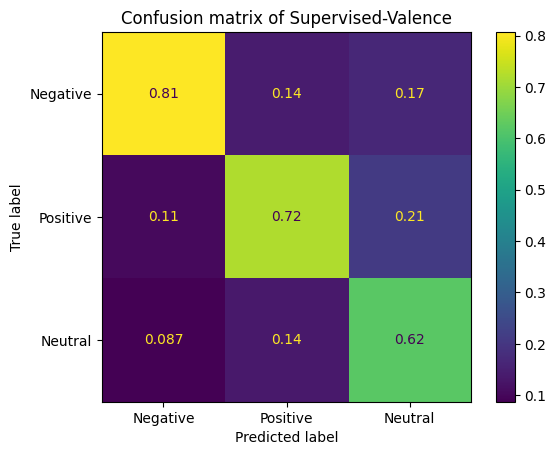

----------------------------------------------------------------------------------------------------
BERT-Valence
{0: 397, 1: 187, 2: 118}
Classification report
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       385
           1       0.55      0.58      0.56       175
           2       0.47      0.39      0.42       142

    accuracy                           0.64       702
   macro avg       0.58      0.58      0.58       702
weighted avg       0.64      0.64      0.64       702

Confusion matrix
[[0.73803526 0.28342246 0.33050847]
 [0.12342569 0.54545455 0.20338983]
 [0.13853904 0.17112299 0.46610169]]


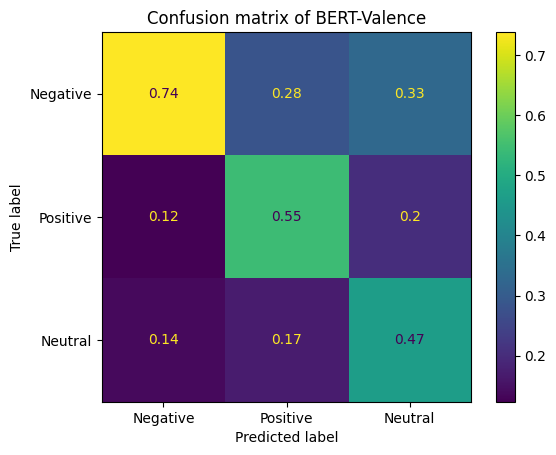

----------------------------------------------------------------------------------------------------
BERT-Combined
{0: 432, 1: 190, 2: 80}
Classification report
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       385
           1       0.57      0.62      0.59       175
           2       0.54      0.30      0.39       142

    accuracy                           0.66       702
   macro avg       0.61      0.58      0.58       702
weighted avg       0.65      0.66      0.64       702

Confusion matrix
[[0.72222222 0.25789474 0.3       ]
 [0.125      0.56842105 0.1625    ]
 [0.15277778 0.17368421 0.5375    ]]


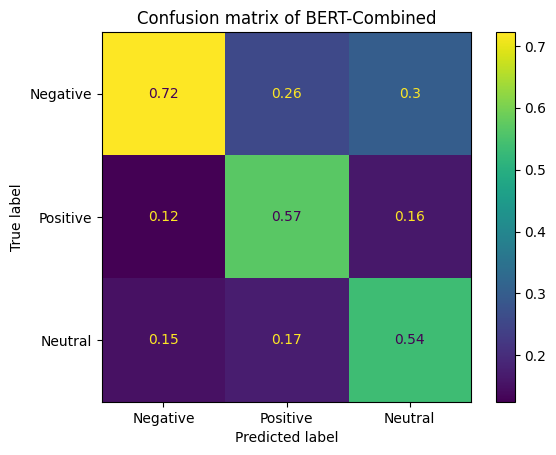

----------------------------------------------------------------------------------------------------
COSINE-Valence
{0: 391, 1: 196, 2: 115}
Classification report
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       385
           1       0.55      0.62      0.58       175
           2       0.48      0.39      0.43       142

    accuracy                           0.66       702
   macro avg       0.60      0.59      0.59       702
weighted avg       0.65      0.66      0.65       702

Confusion matrix
[[0.75959079 0.2755102  0.29565217]
 [0.10485934 0.55102041 0.22608696]
 [0.13554987 0.17346939 0.47826087]]


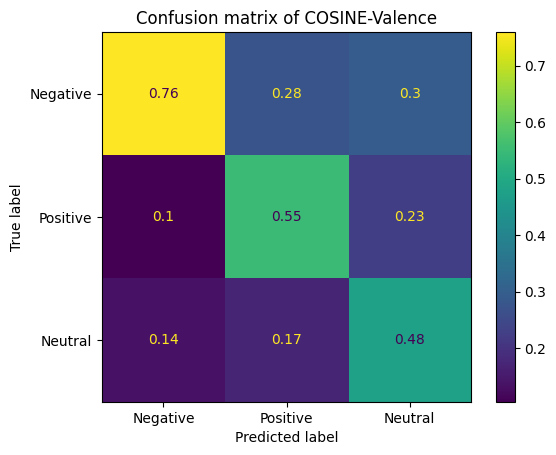

----------------------------------------------------------------------------------------------------
COSINE-Combined
{0: 409, 1: 136, 2: 157}
Classification report
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       385
           1       0.65      0.51      0.57       175
           2       0.46      0.51      0.49       142

    accuracy                           0.67       702
   macro avg       0.62      0.61      0.61       702
weighted avg       0.67      0.67      0.67       702

Confusion matrix
[[0.75550122 0.21323529 0.29936306]
 [0.1198044  0.65441176 0.23566879]
 [0.12469438 0.13235294 0.46496815]]


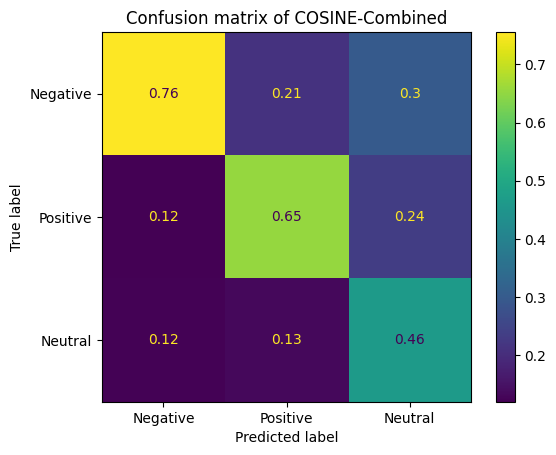

----------------------------------------------------------------------------------------------------
WeaSEL-Valence
{0: 415, 1: 263, 2: 24}
Classification report
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       385
           1       0.50      0.75      0.60       175
           2       0.54      0.09      0.16       142

    accuracy                           0.65       702
   macro avg       0.60      0.55      0.51       702
weighted avg       0.65      0.65      0.61       702

Confusion matrix
[[0.75180723 0.25095057 0.29166667]
 [0.09638554 0.49809886 0.16666667]
 [0.15180723 0.25095057 0.54166667]]


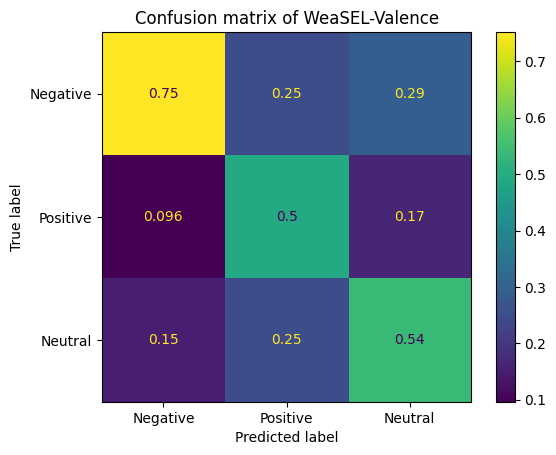

----------------------------------------------------------------------------------------------------
WeaSEL-Combined
{0: 501, 1: 201}
Classification report
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       385
           1       0.57      0.65      0.61       175
           2       0.00      0.00      0.00       142

    accuracy                           0.67       702
   macro avg       0.42      0.52      0.47       702
weighted avg       0.53      0.67      0.59       702

Confusion matrix
[[0.70658683 0.15422886 0.        ]
 [0.12175649 0.56716418 0.        ]
 [0.17165669 0.27860697 0.        ]]


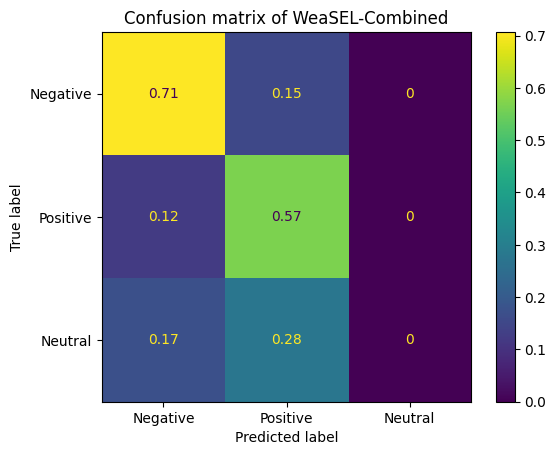

----------------------------------------------------------------------------------------------------


In [ ]:
print("Valence dataset classification class counts")

plt.style.use("default")


for model_name in preds:
  print(model_name)
  unique, counts = np.unique(preds[model_name], return_counts=True)
  print(dict(zip(unique, counts)))

  print("Classification report")
  print(classification_report(y_true, preds[model_name]))

  print("Confusion matrix")
  cm = confusion_matrix(y_true, preds[model_name], labels=[0, 1, 2], normalize='pred')
  print(cm)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Negative","Positive","Neutral"])

  #plt.style.use("seaborn")
  #plt.grid('off')
  disp.plot()
  plt.title(f"Confusion matrix of {model_name}")
  plt.savefig(f'figures/{model_name}.png')
  plt.show()
  

  print("-"*100)

In [ ]:
#find all texts where there is not a unanimous decision
c = 0
not_equal = []
for i in range(len(preds["BERT-Combined"])):
  if preds["Supervised-Valence"][i] != preds["BERT-Combined"][i] != preds["COSINE-Combined"][i]: #!= preds["Supervised-Valence"][i]:
    print(preds["Supervised-Valence"][i], preds["BERT-Combined"][i], preds["COSINE-Combined"][i])
    not_equal.append(i)
    c += 1

print(f"There are {c} of such texts.")

2 0 2
0 1 0
0 1 0
2 1 0
2 0 2
2 0 2
2 0 2
2 1 2
2 0 2
0 1 2
0 1 2
2 0 2
0 1 0
1 0 2
2 1 2
2 0 2
0 1 0
2 0 2
0 1 0
0 1 0
0 1 0
2 0 1
2 0 2
0 1 0
2 0 2
2 0 2
1 0 1
2 0 2
1 0 1
0 1 0
2 0 2
0 2 0
1 0 2
0 2 0
1 0 1
0 1 0
2 0 2
1 0 2
2 1 0
0 1 0
1 2 1
2 1 0
2 0 2
0 1 0
0 2 0
2 0 2
2 0 2
2 0 2
0 1 0
2 1 2
0 1 0
2 1 2
1 0 2
2 0 2
1 0 2
1 0 2
2 0 2
0 2 1
0 1 0
2 0 2
0 1 0
2 1 2
0 1 2
2 1 0
2 0 1
0 2 0
0 1 0
0 2 0
2 1 0
2 1 0
0 1 0
2 0 2
0 1 0
0 1 2
2 0 2
0 1 2
0 1 0
2 0 2
2 0 2
1 0 1
2 0 1
0 1 0
0 1 0
0 1 0
2 1 2
0 1 0
1 0 1
2 0 2
0 1 2
2 0 2
0 1 0
1 0 1
2 1 2
0 1 2
0 1 0
2 1 2
2 0 2
2 0 2
0 1 2
1 0 2
0 2 1
2 0 2
2 1 0
0 1 2
2 0 2
0 2 0
0 1 0
2 0 2
There are 108 of such texts.


In [ ]:
for model_name in preds:
  pred = preds[model_name]
  df_test[model_name] = pred

In [ ]:
not_equal

[12,
 13,
 14,
 15,
 27,
 40,
 43,
 49,
 51,
 60,
 62,
 64,
 72,
 75,
 85,
 88,
 93,
 96,
 97,
 101,
 110,
 112,
 113,
 115,
 116,
 117,
 125,
 130,
 132,
 153,
 159,
 162,
 166,
 180,
 186,
 192,
 195,
 196,
 197,
 207,
 209,
 222,
 224,
 238,
 249,
 252,
 260,
 269,
 276,
 285,
 286,
 303,
 312,
 320,
 323,
 326,
 344,
 366,
 369,
 372,
 389,
 394,
 408,
 412,
 413,
 423,
 426,
 433,
 452,
 453,
 454,
 455,
 465,
 471,
 472,
 474,
 476,
 480,
 486,
 488,
 493,
 519,
 521,
 532,
 540,
 554,
 557,
 564,
 566,
 573,
 576,
 587,
 603,
 604,
 615,
 619,
 627,
 631,
 635,
 638,
 639,
 643,
 644,
 646,
 648,
 664,
 674,
 689]

In [ ]:
df_test.iloc[not_equal]#[df_test["label"] == "neutraalne"]

,id,label,text,Supervised-Valence,BERT-Valence,BERT-Combined,COSINE-Valence,COSINE-Combined,WeaSEL-Valence,WeaSEL-Combined
14,14,neutraalne,Krista Aas juhtis enne lapsehoolduspuhkusele minemist keskkriminaalpolitseid ning oli varem keskkriminaalpolitsei kriminaaltulu tuvastamise büroo juht.,2,0,0,0,2,0,0
16,16,positiivne,"100-protsendilist söödutäpsust on Meistrite liigas ka varasemalt näidatud, kuid keegi ei olnud varasemalt suutnud seejuures anda nii palju täpseid sööte. Varasemalt hoidis esikohta Milano Interi argentiinlasest mängumees Javier Zanetii, kes andis 100-protsendilise söödutäpsuse juures 72 söötu, kirjutab Sportsmail.",0,0,1,1,0,0,0
18,18,negatiivne,Kahjutuli sai alguse klubis esinenud ansambli pürotehnilisest vaatemängust. Tunnistajate sõnul pääses tuli lahti kella 2 paiku.,0,0,1,0,0,0,0
19,19,neutraalne,"Peeter Oja teeb monotükis «Nüüd tõesti aitab jamast» samuti nalja. Kuid erinevalt iirlasest on eestlase stand-up-teemadega risti vastupidi. Oja räägib kogu aeg poliitikutest ja nende valimisest ning ainult mõni harv kord millestki muust. Kusjuures see midagi muud on samuti tihedalt seotud valimisega, näiteks puuviljade valimine supermarketis.",2,1,1,1,0,1,0
36,36,neutraalne,"«Kuna laval on ainult mehed,» põhjendab Tarmo Tähepõld Von Krahli teatrist, miks lavastuse «Nibud ehk hetk me elude katkematus reas» piletid on meestele kaks eurot odavamad kui naistele. «Ja ehk saab nii rohkem mehi teatrisse, et neil oleks motivatsiooni tulla.»",2,2,0,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...
749,749,neutraalne,"«Kõne alguses ja lõpus tehti viited oma lapsepõlvele, pöördumist läbis puu kasvamise kujund. Ning läbivana mõte, et me kõik ise oleme oma saatuse sepad,» ütles Rull.",0,0,1,0,2,1,1
751,751,positiivne,"Eesti poodides on praegu müügil 400 sorti jäätist ning igal aastal tuleb juurde paarkümmend uut toodet. «Kuigi vaniljejäätis on Eestis nr 1, siis inimesed otsivad midagi, mis oleks teistmoodi,» tõdes Balbiino kvaliteedi- ja arendusjuht Kristel Männik.",2,2,0,2,2,1,1
771,771,positiivne,Mikk murdis kallima juurde saamiseks reporteriteringist läbi,0,2,2,2,0,2,0
782,782,negatiivne,"Uuri palun, mida tähendab sõna GURU. Eestis ei ole mitte ühelgi alal mitte ühtegi guru olemas. Võimsate tiitlite enesele külge pookimine ei tee inimest paremaks. Tundub, et meil armastatakse ennast üldse palju võõraste sulgedega ehtida.",0,1,1,1,0,1,0


In [ ]:
#incorrectly classified text analysis
df_test.loc[(df_test["label"] == "neutraalne") & (df_test["WeaSEL-Valence"] == 0)]

,id,label,text,Supervised-Valence,BERT-Valence,BERT-Combined,COSINE-Valence,COSINE-Combined,WeaSEL-Valence,WeaSEL-Combined
14,14,neutraalne,Krista Aas juhtis enne lapsehoolduspuhkusele minemist keskkriminaalpolitseid ning oli varem keskkriminaalpolitsei kriminaaltulu tuvastamise büroo juht.,2,0,0,0,2,0,0
36,36,neutraalne,"«Kuna laval on ainult mehed,» põhjendab Tarmo Tähepõld Von Krahli teatrist, miks lavastuse «Nibud ehk hetk me elude katkematus reas» piletid on meestele kaks eurot odavamad kui naistele. «Ja ehk saab nii rohkem mehi teatrisse, et neil oleks motivatsiooni tulla.»",2,2,0,2,2,0,1
42,42,neutraalne,"Kõikide loomade järel tuleb koristada.Loodan et see kellegile uudis pole.Mul kass ja kuskilt ei haise,väga puhas loom ja ei kuse ka ei-tea-mis kohta,ainult oma potti.Teenida pole vaja.Kui ''teenid'' kassi siis arvesta et samamoodi ''teenitakse'' muid loomi ka.",0,0,0,0,0,0,0
43,43,neutraalne,"Täna pärastlõunal enne kella 16 olid teepinna temperatuurid Põhja-Eestis miinuskraadides, mujal Eestis plusskraadides.",2,2,2,0,2,0,0
54,54,neutraalne,"Vast pole asi hinnas vaid pigem selles, et sinivereline kannab klassikat ja punkt.",2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
779,779,neutraalne,"Siiski isegi soodsamate ametiautode praegune 100%-line KM-i soodustuse eeldus tundub imelik. Ei väida, et 50% on see õiglane piir, kuid kuskilt peab jooksma ratsionaalne piir.",0,0,0,0,0,0,0
790,790,neutraalne,Autor on Tartu Ülikooli sotsiaalteaduslike rakendusuuringute keskuse analüütik ja maaülikooli vanemteadur. Kõnealuse plagiaadijuhtumiga maaülikoolis pole ta kuidagi seotud.,0,0,0,0,0,0,0
798,798,neutraalne,"Kokku elab Rae vallas registriandmete põhjal 14 284 elanikku, mis on vähem kui statistikaameti poolt läbiviidud rahvaloenduse põhjal. 2011. aasta 31. detsembri seisuga elas rahvaloenduse andmete järgi Rae vallas aga 15 721 inimest.",2,2,0,2,2,0,0
800,800,neutraalne,Tõnu Õnnepalu: teekond pimedusse,2,2,0,0,0,0,1


## Postimees test set evaluation

In [ ]:
!gdown --id 1kEbZv4DYdF6O6rSPSnBWYz0jfTbfWSvZ # Postimees-test.csv

Downloading...
From: https://drive.google.com/uc?id=1kEbZv4DYdF6O6rSPSnBWYz0jfTbfWSvZ
To: /content/Postimees-test.csv
100% 533k/533k [00:00<00:00, 75.3MB/s]


In [ ]:
#TEST SET
colnames = ["text", "date", "title"]
df_test = pd.read_csv("Postimees-test.csv", names=colnames, sep=',', header=0)
df_test.drop(["date", "title"], axis=1, inplace=True)
print(len(df_test))
assert len(df_test) == 1429

1429


In [ ]:
df_test.iloc[1428]

text    Kui nüüd Reformierakond asub Uno Mereste seisukohti aktiivselt toetama , astub Reformierakond võrdväärsena KMÜ kõrvale , näidates , et oma juhtliikmete kasuahnuse ja saamahimu huvides ollakse kõigeks valmis .
Name: 1428, dtype: object

In [ ]:
#Postimees classification predictions

models = {"Supervised-Valence": "/content/predictions-all/predictions-postimees/supervised-valency-predictions.pkl",
          "BERT-Valence": "/content/predictions-all/predictions-postimees/bert-valency-predictions.pkl",
          "BERT-Combined": "/content/predictions-all/predictions-postimees/bert-combined-predictions.pkl",
          "COSINE-Valence": "/content/predictions-all/predictions-postimees/cosine-valency-predictions.pkl",
          "COSINE-Combined": "/content/predictions-all/predictions-postimees/cosine-combined-predictions.pkl",
          "WeaSEL-Valence": "/content/predictions-all/predictions-postimees/weasel-valency-predictions.pkl",
          "WeaSEL-Combined": "/content/predictions-all/predictions-postimees/weasel-combined-predictions.pkl"
          }

preds = {}
for model_name in models:
  model_path = models[model_name]
  with open(model_path, "rb") as f:
    preds[model_name] = pickle.load(f)

In [ ]:
print("Postimees dataset classification class counts")

for model_name in preds:
  print(model_name)
  unique, counts = np.unique(preds[model_name], return_counts=True)
  print(dict(zip(unique, counts)))

  #print("Classification report")
  #print(classification_report(y_true, preds[model_name]))

  #print("Confusion matrix")
  #cm = confusion_matrix(y_true, preds[model_name], labels=[0, 1, 2])
  #print(cm)

  #disp = ConfusionMatrixDisplay(confusion_matrix=cm,
  #                            display_labels=["negatiivne","positiivne","neutraalne"])
  #disp.plot()

  #plt.show()

  print("-"*100)

Postimees dataset classification class counts
Supervised-Valence
{0: 941, 1: 225, 2: 263}
----------------------------------------------------------------------------------------------------
BERT-Valence
{0: 1030, 1: 310, 2: 89}
----------------------------------------------------------------------------------------------------
BERT-Combined
{0: 963, 1: 411, 2: 55}
----------------------------------------------------------------------------------------------------
COSINE-Valence
{0: 886, 1: 417, 2: 126}
----------------------------------------------------------------------------------------------------
COSINE-Combined
{0: 1008, 1: 287, 2: 134}
----------------------------------------------------------------------------------------------------
WeaSEL-Valence
{0: 959, 1: 466, 2: 4}
----------------------------------------------------------------------------------------------------
WeaSEL-Combined
{0: 1106, 1: 323}
--------------------------------------------------------------------------

In [ ]:
df_test

,text
0,"Riigikogu põhiseaduskomisjoni esimees Olav Anton saab koos esinduskuludega iga kuu peo peale 10 965 krooni ja ütleb , et ta tuleb ots otsaga kokku . Poissmehest riigikogulane Mart Nutt , kes saab umbes 9158 krooni , kurdab , et vahel tuleb enne palgapäeva laenulepinguid sõlmida ."
1,"Ehk Anton annaks nõu , kuidas peaks ots otsaga kokku tulema kõrgharidusega perekonnapeast raamatukogu juhataja , kes saab kuus 1100 krooni , loomulikult ilma mingite esinduskuludeta , kuigi peab kah oma tööpostil esinduslik välja nägema . Antoni rehkenduse järgi saaks see mees poes käia vaid kümme korda , kui jätab maksmata korteri eest ja käib katkiste sokkidega ."
2,"Vaesed rahvaesindajad , nüüd saan minagi aru , miks teile veel aasta pärast Riigikogust lahkumist ikka veel tuhandeid kodus istumise eest makstakse - kuna teie kulutused on tavainimeste omadest kümme korda suuremad , sureksite nende tasemele langedes nälga ."
3,"Teeks õige eksperimendi ja kuulutaks enne valimisi , et nüüdsest on saadikute palk 1500-1600 krooni ja ära jäävad esinduskulud ning aastane tasuline puhkus pärast rasket tööd Toompeal . Huvitav oleks näha , kui palju oleks siis neid , kes valimiskampaania käigus mööda maad ringi sõidavad ja rahvale suure suuga lubadusi jagavad ."
4,"Kindral Einselni ametist vabastamine on ilmselt president Lennart Meri ebaõnnestunuim poliitiline samm , jättes seljataha isegi kurikuulsad juulilepped . See samm on vastuolus ka presidendi välispoliitiliste prioriteetidega , millest olulisim on olnud Eesti hea maine loomine ja säilitamine Läänes . Selle sammuga läksid Eestile automaatselt kaduma kõik kindrali mitteametlikud sidemed Pentagonis ja NATOs ."
...,...
1424,"Mereste ei suuda tuua ühtegi vettpidavat põhjendust , miks peaks tegelikkuses sadu tuhandeid kroone maksva krundi kätte saama sisuliselt tasuta . On ju võimalus osta maa järelmaksuga või kasutada hoonestusõiguse võimalusi . Jutud ahnetest rahameestest , kes kohe-kohe majade alt krundid ära ostavad , on lasteaia tasemel . Veelgi absurdsem on Tallinna majaomanike näitamine justkui represseeritutena ."
1425,"Tundub , et Mereste ei näe Tallinnast palju kaugemale , sest tema probleemikäsitlused on väikelinnade ja külade majaomanikele täiesti võõrad . Tallinna majaomanike seisundit ei saa kuidagi võrrelda isegi Lasnamäe korteriomanike omaga , rääkimata ääremaade majaomanikest või siis eramajade üürnikest ."
1426,"Ka tõrgub mõistus Merivälja villasid nimetamast hütikesteks linnaserval . Pigem näitas elamukrundi ja ehitusloa saamine Tallinna omal ajal kuulumist teatud eliidi hulka . See seisund tundub neile nüüd nii iseenesestmõistetav , et soodustusi suisa nõutakse ja seejuures ähvarduste sunnil ."
1427,Uno Mereste Tallinna-keskne õiglus ei kujuta endast muud kui soovi saada võimalikult soodsalt kätte oma Merivälja krunt ja lunastada välja Merivälja majaomanikelt valimistel saadud hääled . Selle eesmärgi nimel on lugupeetud professor nõus riskima nii oma autoriteedi kui ka Reformierakonna senise suhteliselt hea mainega .


In [ ]:
a = np.vstack(list(preds.values()))

In [ ]:
not_equal = np.where(np.all(a == a[0,:], axis = 0) == False)[0]

In [ ]:
len(not_equal) #how many texts did not have a unanimous decision

752

In [ ]:
len(df_test) - len(not_equal) #how many texts had a unanimous set label

677

In [ ]:
not_equal

array([   3,    4,    7,    9,   11,   13,   15,   16,   22,   24,   25,
         26,   28,   29,   32,   33,   34,   35,   37,   41,   43,   44,
         45,   46,   48,   50,   53,   56,   57,   58,   59,   61,   64,
         65,   66,   71,   72,   73,   74,   85,   86,   91,   92,   94,
         95,   97,   98,  104,  105,  106,  107,  108,  109,  112,  113,
        114,  117,  118,  128,  135,  138,  139,  140,  141,  143,  144,
        145,  146,  147,  148,  149,  150,  151,  153,  155,  156,  157,
        159,  161,  163,  164,  165,  167,  168,  171,  174,  187,  188,
        189,  191,  197,  198,  199,  201,  202,  204,  207,  208,  209,
        210,  211,  212,  213,  214,  215,  216,  217,  221,  227,  228,
        229,  234,  237,  239,  240,  241,  242,  243,  244,  251,  252,
        255,  256,  257,  259,  261,  262,  263,  265,  268,  269,  270,
        271,  272,  274,  275,  276,  277,  280,  281,  282,  283,  284,
        287,  289,  290,  291,  292,  294,  295,  2

In [ ]:
preds

{'BERT-Combined': array([0, 0, 0, ..., 0, 1, 1]),
 'BERT-Valence': array([0, 0, 0, ..., 0, 1, 1]),
 'COSINE-Combined': array([0, 0, 0, ..., 0, 1, 1]),
 'COSINE-Valence': array([0, 0, 0, ..., 1, 1, 1]),
 'Supervised-Valence': array([0, 0, 0, ..., 0, 1, 1]),
 'WeaSEL-Combined': array([0, 0, 0, ..., 0, 1, 1]),
 'WeaSEL-Valence': array([0, 0, 0, ..., 1, 1, 1])}

In [ ]:
from scipy.stats import pearsonr

In [ ]:
for m1 in preds:
  for m2 in preds:
    if m1 != m2:
      print(m1, m2, end=" ")
      print(pearsonr(preds[m1], preds[m2]))

Supervised-Valence BERT-Valence (0.43620124946513883, 1.9224264549907884e-67)
Supervised-Valence BERT-Combined (0.34977127280355425, 2.198129436409775e-42)
Supervised-Valence COSINE-Valence (0.50035310886184, 2.161252781531675e-91)
Supervised-Valence COSINE-Combined (0.5003784805820455, 2.1095427266854127e-91)
Supervised-Valence WeaSEL-Valence (0.4089108518704841, 1.0335122943109542e-58)
Supervised-Valence WeaSEL-Combined (0.44554327860080484, 1.2773284348130783e-70)
BERT-Valence Supervised-Valence (0.43620124946513883, 1.9224264549907884e-67)
BERT-Valence BERT-Combined (0.517968776943742, 6.5266859271273635e-99)
BERT-Valence COSINE-Valence (0.5782004998815469, 2.909764184958122e-128)
BERT-Valence COSINE-Combined (0.6290827462958497, 2.6673473963277218e-158)
BERT-Valence WeaSEL-Valence (0.46219364538911156, 1.5534868596028626e-76)
BERT-Valence WeaSEL-Combined (0.48029433371070945, 2.390184987242372e-83)
BERT-Combined Supervised-Valence (0.34977127280355425, 2.198129436409775e-42)
BERT-

In [ ]:
from collections import Counter

# find texts where the assigned labels disagree the most
def count_overlaps(a):
  
  c = Counter(a)

  if len(c) != 3: #when there is not three classes present, we discard these texts
    return 0

  s = 1
  overlaps = []
  for el, count in c.items():
    overlaps.append(len(a) - count)
    s *= count

  return s

# the higher the overlaps, the more interesting the text is because the classifiers disagree more
"""
2+2+3 highest
1+3+3
1+2+4
1+1+5 lowest
"""
print(count_overlaps([2,1,2,1,0,0,0]))
print(count_overlaps([1,2,2,1,1,2,0]))
print(count_overlaps([1,0,0,2,2,2,2]))
print(count_overlaps([1,0,0,0,2,0,0]))

12
9
8
5


In [ ]:
#find indices using a custom condition
#find all texts where there is not a unanimous decision between supervised, bert-combined and cosine-combined
c = 0
not_equal = []
scores = []
for i in range(len(preds["BERT-Combined"])):
  a = [preds["Supervised-Valence"][i], preds["BERT-Valence"][i], preds["COSINE-Valence"][i], preds["WeaSEL-Valence"][i], \
       preds["BERT-Combined"][i], preds["COSINE-Combined"][i], preds["WeaSEL-Combined"][i]]

  #if preds["Supervised-Valence"][i] != preds["BERT-Combined"][i] != preds["COSINE-Combined"][i] != preds["WeaSEL-Combined"][i]:
  #if preds["BERT-Combined"][i] != preds["BERT-Valence"][i] and preds["COSINE-Combined"][i] != preds["COSINE-Valence"][i] and \
  #preds["Supervised-Valence"][i] != preds["BERT-Combined"][i]:
    #print(preds["Supervised-Valence"][i], preds["BERT-Combined"][i], preds["COSINE-Combined"][i], preds["WeaSEL-Combined"][i])
  scores.append((i, count_overlaps(a)))
  not_equal.append(i)
  c += 1
  
#preds["cosine"] == preds["bert"]
print(f"There are {c} of such texts.")

There are 1429 of such texts.


In [ ]:
scores = sorted(scores, key = lambda x: -x[1])

In [ ]:
scores

[(29, 12),
 (66, 12),
 (72, 12),
 (74, 12),
 (211, 12),
 (213, 12),
 (214, 12),
 (313, 12),
 (447, 12),
 (468, 12),
 (502, 12),
 (714, 12),
 (764, 12),
 (824, 12),
 (915, 12),
 (970, 12),
 (1142, 12),
 (1251, 12),
 (1350, 12),
 (35, 9),
 (53, 9),
 (141, 9),
 (143, 9),
 (144, 9),
 (147, 9),
 (167, 9),
 (227, 9),
 (234, 9),
 (275, 9),
 (372, 9),
 (500, 9),
 (541, 9),
 (554, 9),
 (607, 9),
 (619, 9),
 (634, 9),
 (639, 9),
 (655, 9),
 (662, 9),
 (773, 9),
 (891, 9),
 (892, 9),
 (919, 9),
 (931, 9),
 (938, 9),
 (1052, 9),
 (1077, 9),
 (1195, 9),
 (1210, 9),
 (1280, 9),
 (1310, 9),
 (1355, 9),
 (1367, 9),
 (1399, 9),
 (16, 8),
 (43, 8),
 (92, 8),
 (98, 8),
 (107, 8),
 (145, 8),
 (165, 8),
 (168, 8),
 (174, 8),
 (217, 8),
 (242, 8),
 (263, 8),
 (268, 8),
 (269, 8),
 (284, 8),
 (321, 8),
 (358, 8),
 (359, 8),
 (363, 8),
 (371, 8),
 (378, 8),
 (386, 8),
 (424, 8),
 (455, 8),
 (481, 8),
 (484, 8),
 (494, 8),
 (501, 8),
 (503, 8),
 (506, 8),
 (507, 8),
 (511, 8),
 (514, 8),
 (525, 8),
 (547, 8),


In [ ]:
not_equal = [w[0] for w in scores[:100]]

In [ ]:
not_equal

[29,
 66,
 72,
 74,
 211,
 213,
 214,
 313,
 447,
 468,
 502,
 714,
 764,
 824,
 915,
 970,
 1142,
 1251,
 1350,
 35,
 53,
 141,
 143,
 144,
 147,
 167,
 227,
 234,
 275,
 372,
 500,
 541,
 554,
 607,
 619,
 634,
 639,
 655,
 662,
 773,
 891,
 892,
 919,
 931,
 938,
 1052,
 1077,
 1195,
 1210,
 1280,
 1310,
 1355,
 1367,
 1399,
 16,
 43,
 92,
 98,
 107,
 145,
 165,
 168,
 174,
 217,
 242,
 263,
 268,
 269,
 284,
 321,
 358,
 359,
 363,
 371,
 378,
 386,
 424,
 455,
 481,
 484,
 494,
 501,
 503,
 506,
 507,
 511,
 514,
 525,
 547,
 593,
 594,
 596,
 598,
 613,
 643,
 650,
 690,
 812,
 817,
 821]

In [ ]:
for model_name in preds:
  pred = preds[model_name]
  df_test[model_name] = pred

In [ ]:
df_test

,text,Supervised-Valence,BERT-Valence,BERT-Combined,COSINE-Valence,COSINE-Combined,WeaSEL-Valence,WeaSEL-Combined
0,"Riigikogu põhiseaduskomisjoni esimees Olav Anton saab koos esinduskuludega iga kuu peo peale 10 965 krooni ja ütleb , et ta tuleb ots otsaga kokku . Poissmehest riigikogulane Mart Nutt , kes saab umbes 9158 krooni , kurdab , et vahel tuleb enne palgapäeva laenulepinguid sõlmida .",0,0,0,0,0,0,0
1,"Ehk Anton annaks nõu , kuidas peaks ots otsaga kokku tulema kõrgharidusega perekonnapeast raamatukogu juhataja , kes saab kuus 1100 krooni , loomulikult ilma mingite esinduskuludeta , kuigi peab kah oma tööpostil esinduslik välja nägema . Antoni rehkenduse järgi saaks see mees poes käia vaid kümme korda , kui jätab maksmata korteri eest ja käib katkiste sokkidega .",0,0,0,0,0,0,0
2,"Vaesed rahvaesindajad , nüüd saan minagi aru , miks teile veel aasta pärast Riigikogust lahkumist ikka veel tuhandeid kodus istumise eest makstakse - kuna teie kulutused on tavainimeste omadest kümme korda suuremad , sureksite nende tasemele langedes nälga .",0,0,0,0,0,0,0
3,"Teeks õige eksperimendi ja kuulutaks enne valimisi , et nüüdsest on saadikute palk 1500-1600 krooni ja ära jäävad esinduskulud ning aastane tasuline puhkus pärast rasket tööd Toompeal . Huvitav oleks näha , kui palju oleks siis neid , kes valimiskampaania käigus mööda maad ringi sõidavad ja rahvale suure suuga lubadusi jagavad .",0,0,1,1,1,1,1
4,"Kindral Einselni ametist vabastamine on ilmselt president Lennart Meri ebaõnnestunuim poliitiline samm , jättes seljataha isegi kurikuulsad juulilepped . See samm on vastuolus ka presidendi välispoliitiliste prioriteetidega , millest olulisim on olnud Eesti hea maine loomine ja säilitamine Läänes . Selle sammuga läksid Eestile automaatselt kaduma kõik kindrali mitteametlikud sidemed Pentagonis ja NATOs .",0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
1424,"Mereste ei suuda tuua ühtegi vettpidavat põhjendust , miks peaks tegelikkuses sadu tuhandeid kroone maksva krundi kätte saama sisuliselt tasuta . On ju võimalus osta maa järelmaksuga või kasutada hoonestusõiguse võimalusi . Jutud ahnetest rahameestest , kes kohe-kohe majade alt krundid ära ostavad , on lasteaia tasemel . Veelgi absurdsem on Tallinna majaomanike näitamine justkui represseeritutena .",0,0,1,0,0,0,0
1425,"Tundub , et Mereste ei näe Tallinnast palju kaugemale , sest tema probleemikäsitlused on väikelinnade ja külade majaomanikele täiesti võõrad . Tallinna majaomanike seisundit ei saa kuidagi võrrelda isegi Lasnamäe korteriomanike omaga , rääkimata ääremaade majaomanikest või siis eramajade üürnikest .",0,0,0,0,0,0,0
1426,"Ka tõrgub mõistus Merivälja villasid nimetamast hütikesteks linnaserval . Pigem näitas elamukrundi ja ehitusloa saamine Tallinna omal ajal kuulumist teatud eliidi hulka . See seisund tundub neile nüüd nii iseenesestmõistetav , et soodustusi suisa nõutakse ja seejuures ähvarduste sunnil .",0,0,0,1,0,1,0
1427,Uno Mereste Tallinna-keskne õiglus ei kujuta endast muud kui soovi saada võimalikult soodsalt kätte oma Merivälja krunt ja lunastada välja Merivälja majaomanikelt valimistel saadud hääled . Selle eesmärgi nimel on lugupeetud professor nõus riskima nii oma autoriteedi kui ka Reformierakonna senise suhteliselt hea mainega .,1,1,1,1,1,1,1


In [ ]:
different_decision = df_test.iloc[not_equal]

In [ ]:
different_decision

,text,Supervised-Valence,BERT-Valence,BERT-Combined,COSINE-Valence,COSINE-Combined,WeaSEL-Valence,WeaSEL-Combined
29,"Hoopis vähem mõeldakse sellele , et mainitud leping vajab ka ratifitseerimist . Sellele peab mõtlema see minister , kes parlamendi ees ettekande esitab . Eesti oludes on selleks ministriks välisminister . Ning leping vajab Riigikogus heakskiitmiseks kaht kolmandikku parlamendiliikmete häältest .",2,2,0,1,2,0,1
66,"Tegelikult on Venemaa meelest suhted normaalsed siis , kui Eesti on sisuliselt nõustunud nullvariandiga kodakondsuse küsimustes . Selles küsimuses orienteerub Euroopa pigem Venemaa kui Eesti lõppjäreldusele . Sellele viitab viimane ÜRO aruanne inimõiguste olukorrast .",2,0,1,2,1,0,1
72,Käibelolevate Eesti Posti eeskirjade kohaselt tuleb panderoll siduda nööriga . Olen Võru posti kaudu saatnud USAsse mitmeid selliseid karvase ja takuse nööriga ( millist omal ajal kasutati kolhoosides linapeode sidumiseks ) seotud panderolle .,2,1,0,2,2,1,0
74,"Millisel seisukohal on Eesti Posti juhtkond ? Kas ta nõustub minu ettepanekuga või leiab , et antud küsimuses on süüdi jällegi kohalikud ametimehed , nagu see tavaks on saanud .",2,2,0,1,1,1,0
211,Nii MRPle kui ka juulilepetele järgnesid omaaegses N.Liidus ja selle tänapäeva õigusjärglases Vene Föderatsioonis Balti riikide rahvaid ähvardavad instruktsioonid ja määrused .,1,0,0,2,2,1,1
...,...,...,...,...,...,...,...,...
650,"Päev varem , 20. detsembril 1920 oli oma viimase koosoleku pidanud Asutav Kogu , et tööjärg üle anda juba põhiseaduslikule rahvaesindusele Riigikogule . 20. detsembri “ Riigi Teataja ” tõi ära novembri lõpul toimunud valimiste tulemused ja Riigikogu esimese koosseisu nimekirja , kohe algasid ka selle volitused . Kuigi Riigikogu tuli kokku alles pärast jõuluvaheaega , jaanuaris 1921 , võib juba täna öelda , et Eesti parlament on 75 aastat vanaks saanud",1,1,0,2,0,0,0
690,"Sellegipoolest on seadustandvas saalis ilma muigeta suudetud arutleda , kas tõsta lapsetoetust viie või kümne krooni võrra kuus . Suure kingitusena on mängitud mõnesaja krooni lisamist õpetajate palgale . Toimetulekutoetuste tõstmine on ikka käinud mõnekümne krooni kaupa .",0,0,1,2,1,0,0
812,"Kanoonilise suuna tuumiku moodustavad neli preestrit , kes on veendunud , et kirikliku staatuse muutmiseks on vaja EAÕK vastuvõtu teadet Konstantinoopoli patriarhilt ja lahtilaskmiskirja Moskva patriarhilt .",2,0,1,2,1,1,1
817,Sellega aga sarnasus piirduski . Tegelikult olid naabrid ühesuguses olukorras vaid üksikute väliste näitajate järgi . Soomel oli enne seda otsust ning edaspidigi oluline edumaa .,0,1,0,1,2,1,1


In [ ]:
different_decision.to_csv("Postimees_test_annotation.csv")

# Human Evaluation Analysis

In [ ]:
import pandas as pd
from scipy.stats import pearsonr
from nltk.metrics.agreement import AnnotationTask
from nltk.metrics import masi_distance
from collections import Counter


import numpy as np
from sklearn.metrics import *
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
!gdown --id 13Zvsu9xbiWWKIGZZQSNormqY6HMvLEh1 # Postimees-labelling
!gdown --id 1YlB-dC8JgJtR_OIPPxLwY63Iitj2aRBD # Postimees-labelling
!gdown --id 1OGjSLgxw0EWITJoeH2R8DbXPAPg7fpcC # Postimees-labelling
!gdown --id 1eEH6DW-A8Lq7vC9ZmCyqor_LvQXKM0-T # Postimees_test_annotation

Downloading...
From: https://drive.google.com/uc?id=13Zvsu9xbiWWKIGZZQSNormqY6HMvLEh1
To: /content/Postimees-labelling-Andreas.xlsx
100% 26.3k/26.3k [00:00<00:00, 14.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YlB-dC8JgJtR_OIPPxLwY63Iitj2aRBD
To: /content/Postimees-labelling-Eve.xlsx
100% 27.6k/27.6k [00:00<00:00, 22.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OGjSLgxw0EWITJoeH2R8DbXPAPg7fpcC
To: /content/Postimees-labelling-Eveli.xlsx
100% 26.3k/26.3k [00:00<00:00, 34.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1eEH6DW-A8Lq7vC9ZmCyqor_LvQXKM0-T
To: /content/Postimees_test_annotation.csv
100% 27.8k/27.8k [00:00<00:00, 36.1MB/s]


In [ ]:
def read_annotator_file(filename, labeller_name):
  df = pd.read_excel(filename, names = ["id", "text", "label", "ambiguous"], usecols="A:D", skiprows=4)
  #print(df["ambiguous"].isnull().values)
  df["ambiguous"] = df["ambiguous"].fillna(0)
  df["ambiguous"] = df["ambiguous"].replace("jah", 1)
  df["ambiguous"] = df["ambiguous"].replace("jah?", 1)
  df["ambiguous"] = df["ambiguous"].replace("jah??", 1)
  df["labeller"] = labeller_name
  df.label = df.label.astype(int)
  df.id = df.id.astype(int)
  #print(df["ambiguous"].values)
  return df

read_annotator_file("Postimees-labelling-Eveli.xlsx", "Eveli")

,id,text,label,ambiguous,labeller
0,29,"Hoopis vähem mõeldakse sellele , et mainitud l...",0,0,Eveli
1,66,Tegelikult on Venemaa meelest suhted normaalse...,2,0,Eveli
2,72,Käibelolevate Eesti Posti eeskirjade kohaselt ...,2,0,Eveli
3,74,Millisel seisukohal on Eesti Posti juhtkond ? ...,0,0,Eveli
4,211,Nii MRPle kui ka juulilepetele järgnesid omaae...,0,0,Eveli
...,...,...,...,...,...
95,650,"Päev varem , 20. detsembril 1920 oli oma viima...",1,0,Eveli
96,690,Sellegipoolest on seadustandvas saalis ilma mu...,0,0,Eveli
97,812,Kanoonilise suuna tuumiku moodustavad neli pre...,2,0,Eveli
98,817,Sellega aga sarnasus piirduski . Tegelikult ol...,0,0,Eveli


In [ ]:
labeller1 = read_annotator_file("/content/Postimees-labelling-Andreas.xlsx", "Andreas")
labeller2 = read_annotator_file("/content/Postimees-labelling-Eve.xlsx", "Eve")
labeller3 = read_annotator_file("/content/Postimees-labelling-Eveli.xlsx", "Eveli")
labellers = {"Andreas": labeller1, "Eve": labeller2, "Eveli": labeller3}

In [ ]:
ABSTAIN = -1
POS = 1
NEG = 0
NEUT = 2

cats_ind = {"positiivne": POS, "negatiivne": NEG, "neutraalne": NEUT, "teadmata": ABSTAIN}

In [ ]:
# Finding label counts for all labellers

def get_individual_stats(df):
  c1 = Counter(df.label)

  print(c1)

  c2 = Counter(df.ambiguous)
  print(c2)
  print()

for labeller, df in labellers.items():
  print(labeller)
  get_individual_stats(df)

Andreas
Counter({2: 58, 0: 37, 1: 5})
Counter({0: 82, 1: 18})

Eve
Counter({2: 44, 0: 30, 1: 26})
Counter({0: 93, 1: 7})

Eveli
Counter({2: 42, 0: 40, 1: 18})
Counter({0: 88, 1: 12})



## Finding Cohen's Kappas between each pair of labellers

In [ ]:
#For transforming the data into a correct format
def create_tuples(fourples=False):
  ambiguous_ids = set()
  tuples = []
  for df in labellers.values():
    for index, row in df.iterrows():
      
      if not fourples: #create a triple
        tuple = (row.labeller, row.id, row.label)
      else:
        tuple = (row.labeller, row.id, row.label, row.ambiguous) #add also ambiguous for analysis
      
      tuples.append(tuple)

      if row.ambiguous == 1:
        ambiguous_ids.add(row.id)

  return tuples, ambiguous_ids

tuples, ambiguous_ids = create_tuples(True)

In [ ]:
tuples

[('Andreas', 29, 0, 0),
 ('Andreas', 66, 0, 0),
 ('Andreas', 72, 2, 0),
 ('Andreas', 74, 0, 0),
 ('Andreas', 211, 0, 0),
 ('Andreas', 213, 2, 0),
 ('Andreas', 214, 2, 0),
 ('Andreas', 313, 0, 1),
 ('Andreas', 447, 0, 1),
 ('Andreas', 468, 2, 0),
 ('Andreas', 502, 2, 0),
 ('Andreas', 714, 2, 0),
 ('Andreas', 764, 0, 1),
 ('Andreas', 824, 0, 1),
 ('Andreas', 915, 2, 1),
 ('Andreas', 970, 2, 0),
 ('Andreas', 1142, 2, 0),
 ('Andreas', 1251, 2, 1),
 ('Andreas', 1350, 0, 0),
 ('Andreas', 35, 2, 1),
 ('Andreas', 53, 2, 1),
 ('Andreas', 141, 2, 0),
 ('Andreas', 143, 2, 0),
 ('Andreas', 144, 2, 0),
 ('Andreas', 147, 2, 0),
 ('Andreas', 167, 2, 0),
 ('Andreas', 227, 2, 0),
 ('Andreas', 234, 2, 0),
 ('Andreas', 275, 0, 1),
 ('Andreas', 372, 0, 0),
 ('Andreas', 500, 2, 0),
 ('Andreas', 541, 2, 0),
 ('Andreas', 554, 0, 1),
 ('Andreas', 607, 2, 0),
 ('Andreas', 619, 2, 0),
 ('Andreas', 634, 2, 0),
 ('Andreas', 639, 0, 1),
 ('Andreas', 655, 2, 0),
 ('Andreas', 662, 2, 1),
 ('Andreas', 773, 0, 0),
 ('

In [ ]:
assert len(tuples) == 300

In [ ]:
labellers.keys()

dict_keys(['Andreas', 'Eve', 'Eveli'])

In [ ]:
#Cohen's Kappa values of assigned labels
def find_cohen_kappas(tuples, ambiguous=False):

  for name in labellers:
    print([n for n in labellers.keys() if n != name], end=" ")
    if not ambiguous:
      tuples_two_annotators = [tuple[:3] for tuple in tuples if tuple[0] != name]
    else:
      tuples_two_annotators = [t[:2] + t[-1:] for t in tuples if t[0] != name]
    random_task = AnnotationTask(tuples_two_annotators)
    print(random_task.kappa())

find_cohen_kappas(tuples, ambiguous=False)

['Eve', 'Eveli'] 0.5527452190006168
['Andreas', 'Eveli'] 0.44944944944944953
['Andreas', 'Eve'] 0.291237113402062


In [ ]:
#Cohen Kappas of the 'ambiguous' flag
find_cohen_kappas(tuples, True)

['Eve', 'Eveli'] 0.24942263279445734
['Andreas', 'Eveli'] 0.06542056074766409
['Andreas', 'Eve'] 0.24377224199288275


## Inter-annotator agreement scores

In [ ]:
tuples, ambiguous_ids = create_tuples()

In [ ]:
tuples

[('Andreas', 29, 0),
 ('Andreas', 66, 0),
 ('Andreas', 72, 2),
 ('Andreas', 74, 0),
 ('Andreas', 211, 0),
 ('Andreas', 213, 2),
 ('Andreas', 214, 2),
 ('Andreas', 313, 0),
 ('Andreas', 447, 0),
 ('Andreas', 468, 2),
 ('Andreas', 502, 2),
 ('Andreas', 714, 2),
 ('Andreas', 764, 0),
 ('Andreas', 824, 0),
 ('Andreas', 915, 2),
 ('Andreas', 970, 2),
 ('Andreas', 1142, 2),
 ('Andreas', 1251, 2),
 ('Andreas', 1350, 0),
 ('Andreas', 35, 2),
 ('Andreas', 53, 2),
 ('Andreas', 141, 2),
 ('Andreas', 143, 2),
 ('Andreas', 144, 2),
 ('Andreas', 147, 2),
 ('Andreas', 167, 2),
 ('Andreas', 227, 2),
 ('Andreas', 234, 2),
 ('Andreas', 275, 0),
 ('Andreas', 372, 0),
 ('Andreas', 500, 2),
 ('Andreas', 541, 2),
 ('Andreas', 554, 0),
 ('Andreas', 607, 2),
 ('Andreas', 619, 2),
 ('Andreas', 634, 2),
 ('Andreas', 639, 0),
 ('Andreas', 655, 2),
 ('Andreas', 662, 2),
 ('Andreas', 773, 0),
 ('Andreas', 891, 2),
 ('Andreas', 892, 1),
 ('Andreas', 919, 2),
 ('Andreas', 931, 2),
 ('Andreas', 938, 2),
 ('Andreas', 

In [ ]:
#How many texts had at least one 'ambigous' flag assigned by either of the three labellers
len(ambiguous_ids)

29

In [ ]:
#Removing all of the texts where at least one labeller thought it was ambiguous
def remove_ambiguous(tuples):
  tuples_no_ambiguous = []
  for tuple in tuples:
    if tuple[1] not in ambiguous_ids:
      tuples_no_ambiguous.append(tuple)
  return tuples_no_ambiguous

tuples_no_ambiguous = remove_ambiguous(tuples)

In [ ]:
print(len(tuples))
print(len(ambiguous_ids))
assert len(tuples) - len(ambiguous_ids) * 3 == len(tuples_no_ambiguous)

300
29


In [ ]:
def print_statistics(tuples):
  # https://www.nltk.org/_modules/nltk/metrics/agreement.html
  task = AnnotationTask(tuples)
  alpha = task.alpha()
  print("Krippendorff's 1980 Alpha", alpha)

  avg_ao = task.avg_Ao()
  print("Average observed agreement across all coders and items.", avg_ao)

  pi = task.pi()
  print("Scott 1955; here, multi-pi. Equivalent to K from Siegel and Castellan (1988)", pi)

  S = task.S()
  print("Bennett, Albert and Goldstein 1954, S", S)

  kappa = task.kappa()
  print("Cohen's Kappa 1960", kappa)

  multi_kappa = task.multi_kappa()
  print("Davies and Fleiss 1982", multi_kappa)

print_statistics(tuples)

Krippendorff's 1980 Alpha 0.42805067311509726
Average observed agreement across all coders and items. 0.6466666666666666
Scott 1955; here, multi-pi. Equivalent to K from Siegel and Castellan (1988) 0.4261377991121376
Bennett, Albert and Goldstein 1954, S 0.4699999999999999
Cohen's Kappa 1960 0.4311439272840427
Davies and Fleiss 1982 0.4327303863855292


In [ ]:
print_statistics(tuples_no_ambiguous)

Krippendorff's 1980 Alpha 0.5531197301854975
Average observed agreement across all coders and items. 0.7417840375586854
Scott 1955; here, multi-pi. Equivalent to K from Siegel and Castellan (1988) 0.5510118043844856
Bennett, Albert and Goldstein 1954, S 0.612676056338028
Cohen's Kappa 1960 0.5530535613467005
Davies and Fleiss 1982 0.5548335613315092


## Finding the ground truth labels

In [ ]:
merged1 = pd.merge(labeller1, labeller2, on=['text', "id"], suffixes=("_Andreas", "_Eve"))
merged1

,id,text,label_Andreas,ambiguous_Andreas,labeller_Andreas,label_Eve,ambiguous_Eve,labeller_Eve
0,29,"Hoopis vähem mõeldakse sellele , et mainitud l...",0,0,Andreas,2,0,Eve
1,66,Tegelikult on Venemaa meelest suhted normaalse...,0,0,Andreas,2,0,Eve
2,72,Käibelolevate Eesti Posti eeskirjade kohaselt ...,2,0,Andreas,0,0,Eve
3,74,Millisel seisukohal on Eesti Posti juhtkond ? ...,0,0,Andreas,0,0,Eve
4,211,Nii MRPle kui ka juulilepetele järgnesid omaae...,0,0,Andreas,0,0,Eve
...,...,...,...,...,...,...,...,...
95,650,"Päev varem , 20. detsembril 1920 oli oma viima...",2,0,Andreas,1,0,Eve
96,690,Sellegipoolest on seadustandvas saalis ilma mu...,1,0,Andreas,1,0,Eve
97,812,Kanoonilise suuna tuumiku moodustavad neli pre...,2,0,Andreas,2,0,Eve
98,817,Sellega aga sarnasus piirduski . Tegelikult ol...,0,0,Andreas,0,0,Eve


In [ ]:
merged = pd.merge(merged1, labeller3, on=['text', "id"])
merged = merged.rename(columns={'label': 'label_Eveli', 'ambiguous': 'ambiguous_Eveli', 'labeller': 'labeller_Eveli'})
merged

,id,text,label_Andreas,ambiguous_Andreas,labeller_Andreas,label_Eve,ambiguous_Eve,labeller_Eve,label_Eveli,ambiguous_Eveli,labeller_Eveli
0,29,"Hoopis vähem mõeldakse sellele , et mainitud l...",0,0,Andreas,2,0,Eve,0,0,Eveli
1,66,Tegelikult on Venemaa meelest suhted normaalse...,0,0,Andreas,2,0,Eve,2,0,Eveli
2,72,Käibelolevate Eesti Posti eeskirjade kohaselt ...,2,0,Andreas,0,0,Eve,2,0,Eveli
3,74,Millisel seisukohal on Eesti Posti juhtkond ? ...,0,0,Andreas,0,0,Eve,0,0,Eveli
4,211,Nii MRPle kui ka juulilepetele järgnesid omaae...,0,0,Andreas,0,0,Eve,0,0,Eveli
...,...,...,...,...,...,...,...,...,...,...,...
95,650,"Päev varem , 20. detsembril 1920 oli oma viima...",2,0,Andreas,1,0,Eve,1,0,Eveli
96,690,Sellegipoolest on seadustandvas saalis ilma mu...,1,0,Andreas,1,0,Eve,0,0,Eveli
97,812,Kanoonilise suuna tuumiku moodustavad neli pre...,2,0,Andreas,2,0,Eve,2,0,Eveli
98,817,Sellega aga sarnasus piirduski . Tegelikult ol...,0,0,Andreas,0,0,Eve,0,0,Eveli


In [ ]:
goldens = []
remove_indexes = []
for index, row in merged.iterrows():
  l = set()
  c = Counter()
  l.add(row.label_Andreas)
  l.add(row.label_Eve)
  l.add(row.label_Eveli)
  if len(l) == 3:
    print(row.id, row.label_Andreas, row.label_Eve, row.label_Eveli)
    #golden = row.label_Andreas
    remove_indexes.append(row.id)
    ambiguous_ids.add(row.id)
  else:
    golden = Counter([row.label_Andreas, row.label_Eve, row.label_Eveli]).most_common()[0][0]
    goldens.append(golden)

167 2 1 0
619 2 1 0
92 0 1 2
263 0 2 1


In [ ]:
len(ambiguous_ids)

30

In [ ]:
len(goldens)

96

In [ ]:
merged = merged[~merged.id.isin(remove_indexes)]

In [ ]:
len(merged) #after removing texts where all labels are different

96

In [ ]:
merged["golden"] = goldens

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
merged

,id,text,label_Andreas,ambiguous_Andreas,labeller_Andreas,label_Eve,ambiguous_Eve,labeller_Eve,label_Eveli,ambiguous_Eveli,labeller_Eveli,golden
0,29,"Hoopis vähem mõeldakse sellele , et mainitud l...",0,0,Andreas,2,0,Eve,0,0,Eveli,0
1,66,Tegelikult on Venemaa meelest suhted normaalse...,0,0,Andreas,2,0,Eve,2,0,Eveli,2
2,72,Käibelolevate Eesti Posti eeskirjade kohaselt ...,2,0,Andreas,0,0,Eve,2,0,Eveli,2
3,74,Millisel seisukohal on Eesti Posti juhtkond ? ...,0,0,Andreas,0,0,Eve,0,0,Eveli,0
4,211,Nii MRPle kui ka juulilepetele järgnesid omaae...,0,0,Andreas,0,0,Eve,0,0,Eveli,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,650,"Päev varem , 20. detsembril 1920 oli oma viima...",2,0,Andreas,1,0,Eve,1,0,Eveli,1
96,690,Sellegipoolest on seadustandvas saalis ilma mu...,1,0,Andreas,1,0,Eve,0,0,Eveli,1
97,812,Kanoonilise suuna tuumiku moodustavad neli pre...,2,0,Andreas,2,0,Eve,2,0,Eveli,2
98,817,Sellega aga sarnasus piirduski . Tegelikult ol...,0,0,Andreas,0,0,Eve,0,0,Eveli,0


In [ ]:
merged_no_ambiguous = merged.loc[merged["ambiguous_Andreas"] == 0]
merged_no_ambiguous = merged_no_ambiguous.loc[merged_no_ambiguous["ambiguous_Eve"] == 0]
merged_no_ambiguous = merged_no_ambiguous.loc[merged_no_ambiguous["ambiguous_Eveli"] == 0]

In [ ]:
merged_no_ambiguous

,id,text,label_Andreas,ambiguous_Andreas,labeller_Andreas,label_Eve,ambiguous_Eve,labeller_Eve,label_Eveli,ambiguous_Eveli,labeller_Eveli,golden
0,29,"Hoopis vähem mõeldakse sellele , et mainitud l...",0,0,Andreas,2,0,Eve,0,0,Eveli,0
1,66,Tegelikult on Venemaa meelest suhted normaalse...,0,0,Andreas,2,0,Eve,2,0,Eveli,2
2,72,Käibelolevate Eesti Posti eeskirjade kohaselt ...,2,0,Andreas,0,0,Eve,2,0,Eveli,2
3,74,Millisel seisukohal on Eesti Posti juhtkond ? ...,0,0,Andreas,0,0,Eve,0,0,Eveli,0
4,211,Nii MRPle kui ka juulilepetele järgnesid omaae...,0,0,Andreas,0,0,Eve,0,0,Eveli,0
...,...,...,...,...,...,...,...,...,...,...,...,...
94,643,Kuigi valimiste järel moodustatud valitsustel ...,0,0,Andreas,0,0,Eve,0,0,Eveli,0
95,650,"Päev varem , 20. detsembril 1920 oli oma viima...",2,0,Andreas,1,0,Eve,1,0,Eveli,1
96,690,Sellegipoolest on seadustandvas saalis ilma mu...,1,0,Andreas,1,0,Eve,0,0,Eveli,1
97,812,Kanoonilise suuna tuumiku moodustavad neli pre...,2,0,Andreas,2,0,Eve,2,0,Eveli,2


In [ ]:
goldens_no_ambiguous = merged_no_ambiguous["golden"]

## Classifiers performance metrics

In [ ]:
model_names = ["Supervised-Valence", "BERT-Valence", "BERT-Combined",
          "COSINE-Valence", "COSINE-Combined", "WeaSEL-Valence", "WeaSEL-Combined"]

In [ ]:
predictions_df = pd.read_csv("Postimees_test_annotation.csv", names=["id", "text", "Supervised-Valence", "BERT-Valence", "BERT-Combined", "COSINE-Valence", "COSINE-Combined", "WeaSEL-Valence", "WeaSEL-Combined"], header=0)

In [ ]:
predictions_df

,id,text,Supervised-Valence,BERT-Valence,BERT-Combined,COSINE-Valence,COSINE-Combined,WeaSEL-Valence,WeaSEL-Combined
0,29,"Hoopis vähem mõeldakse sellele , et mainitud l...",2,2,0,1,2,0,1
1,66,Tegelikult on Venemaa meelest suhted normaalse...,2,0,1,2,1,0,1
2,72,Käibelolevate Eesti Posti eeskirjade kohaselt ...,2,1,0,2,2,1,0
3,74,Millisel seisukohal on Eesti Posti juhtkond ? ...,2,2,0,1,1,1,0
4,211,Nii MRPle kui ka juulilepetele järgnesid omaae...,1,0,0,2,2,1,1
...,...,...,...,...,...,...,...,...,...
95,650,"Päev varem , 20. detsembril 1920 oli oma viima...",1,1,0,2,0,0,0
96,690,Sellegipoolest on seadustandvas saalis ilma mu...,0,0,1,2,1,0,0
97,812,Kanoonilise suuna tuumiku moodustavad neli pre...,2,0,1,2,1,1,1
98,817,Sellega aga sarnasus piirduski . Tegelikult ol...,0,1,0,1,2,1,1


In [ ]:
len(ambiguous_ids)

30

In [ ]:
predictions_df = predictions_df.loc[~predictions_df.id.isin(remove_indexes)]

In [ ]:
remove_indexes

[167, 619, 92, 263]

In [ ]:
assert len(goldens) == len(predictions_df)

In [ ]:
predictions_df_no_ambiguous = predictions_df.loc[~predictions_df.id.isin(ambiguous_ids)]

In [ ]:
assert len(predictions_df_no_ambiguous) == len(merged_no_ambiguous)

In [ ]:
!mkdir figures

### Statistics and plots with ambiguous texts

Supervised-Valence
{0: 17, 1: 9, 2: 70}
Classification report
              precision    recall  f1-score   support

           0     0.5294    0.2647    0.3529        34
           1     0.6667    0.3750    0.4800        16
           2     0.5857    0.8913    0.7069        46

    accuracy                         0.5833        96
   macro avg     0.5939    0.5103    0.5133        96
weighted avg     0.5793    0.5833    0.5437        96

Confusion matrix
[[0.52941176 0.33333333 0.31428571]
 [0.17647059 0.66666667 0.1       ]
 [0.29411765 0.         0.58571429]]


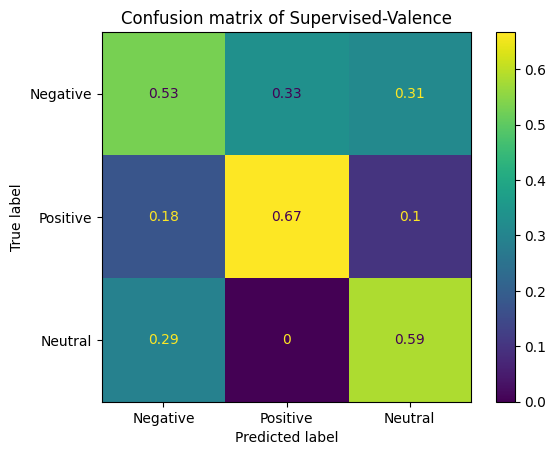

----------------------------------------------------------------------------------------------------
BERT-Valence
{0: 52, 1: 21, 2: 23}
Classification report
              precision    recall  f1-score   support

           0     0.3846    0.5882    0.4651        34
           1     0.0952    0.1250    0.1081        16
           2     0.5217    0.2609    0.3478        46

    accuracy                         0.3542        96
   macro avg     0.3339    0.3247    0.3070        96
weighted avg     0.4021    0.3542    0.3494        96

Confusion matrix
[[0.38461538 0.38095238 0.26086957]
 [0.17307692 0.0952381  0.2173913 ]
 [0.44230769 0.52380952 0.52173913]]


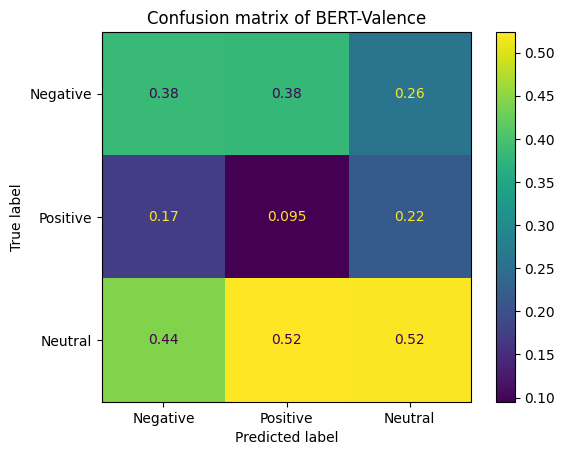

----------------------------------------------------------------------------------------------------
BERT-Combined
{0: 48, 1: 37, 2: 11}
Classification report
              precision    recall  f1-score   support

           0     0.3750    0.5294    0.4390        34
           1     0.1081    0.2500    0.1509        16
           2     0.6364    0.1522    0.2456        46

    accuracy                         0.3021        96
   macro avg     0.3732    0.3105    0.2785        96
weighted avg     0.4558    0.3021    0.2983        96

Confusion matrix
[[0.375      0.35135135 0.27272727]
 [0.22916667 0.10810811 0.09090909]
 [0.39583333 0.54054054 0.63636364]]


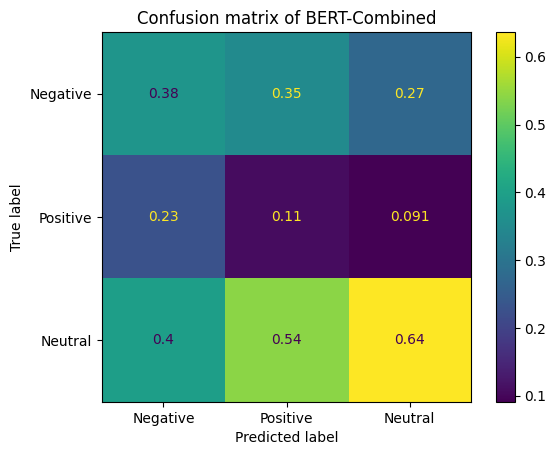

----------------------------------------------------------------------------------------------------
COSINE-Valence
{0: 14, 1: 40, 2: 42}
Classification report
              precision    recall  f1-score   support

           0     0.5000    0.2059    0.2917        34
           1     0.1000    0.2500    0.1429        16
           2     0.5238    0.4783    0.5000        46

    accuracy                         0.3438        96
   macro avg     0.3746    0.3114    0.3115        96
weighted avg     0.4447    0.3438    0.3667        96

Confusion matrix
[[0.5        0.4        0.26190476]
 [0.21428571 0.1        0.21428571]
 [0.28571429 0.5        0.52380952]]


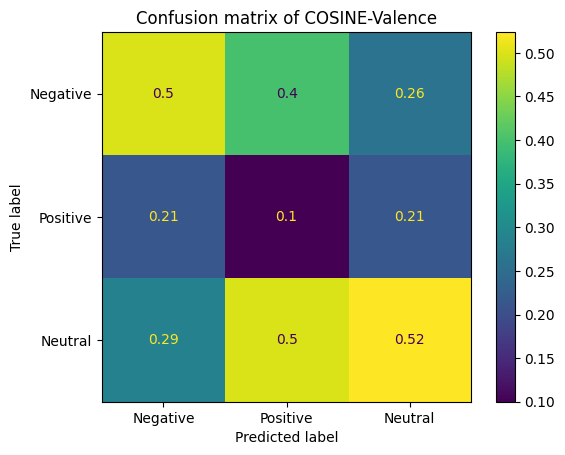

----------------------------------------------------------------------------------------------------
COSINE-Combined
{0: 19, 1: 24, 2: 53}
Classification report
              precision    recall  f1-score   support

           0     0.4737    0.2647    0.3396        34
           1     0.2083    0.3125    0.2500        16
           2     0.5660    0.6522    0.6061        46

    accuracy                         0.4583        96
   macro avg     0.4160    0.4098    0.3986        96
weighted avg     0.4737    0.4583    0.4524        96

Confusion matrix
[[0.47368421 0.45833333 0.26415094]
 [0.10526316 0.20833333 0.16981132]
 [0.42105263 0.33333333 0.56603774]]


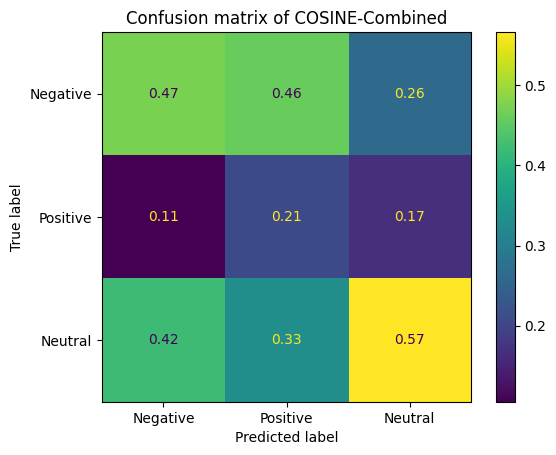

----------------------------------------------------------------------------------------------------
WeaSEL-Valence
{0: 33, 1: 63}
Classification report
              precision    recall  f1-score   support

           0     0.3939    0.3824    0.3881        34
           1     0.2222    0.8750    0.3544        16
           2     0.0000    0.0000    0.0000        46

    accuracy                         0.2812        96
   macro avg     0.2054    0.4191    0.2475        96
weighted avg     0.1766    0.2812    0.1965        96

Confusion matrix
[[0.39393939 0.33333333 0.        ]
 [0.06060606 0.22222222 0.        ]
 [0.54545455 0.44444444 0.        ]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


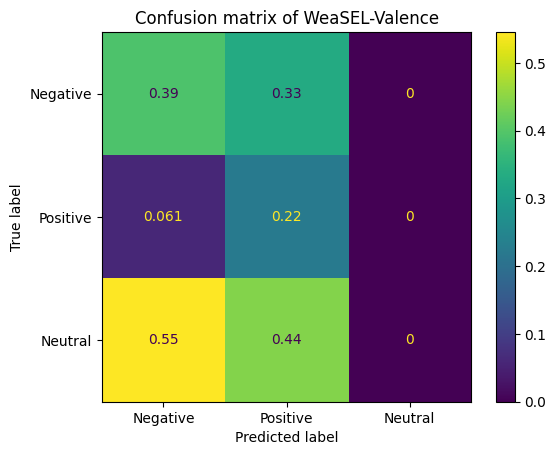

----------------------------------------------------------------------------------------------------
WeaSEL-Combined
{0: 43, 1: 53}
Classification report
              precision    recall  f1-score   support

           0     0.4651    0.5882    0.5195        34
           1     0.2075    0.6875    0.3188        16
           2     0.0000    0.0000    0.0000        46

    accuracy                         0.3229        96
   macro avg     0.2242    0.4252    0.2794        96
weighted avg     0.1993    0.3229    0.2371        96

Confusion matrix
[[0.46511628 0.26415094 0.        ]
 [0.11627907 0.20754717 0.        ]
 [0.41860465 0.52830189 0.        ]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


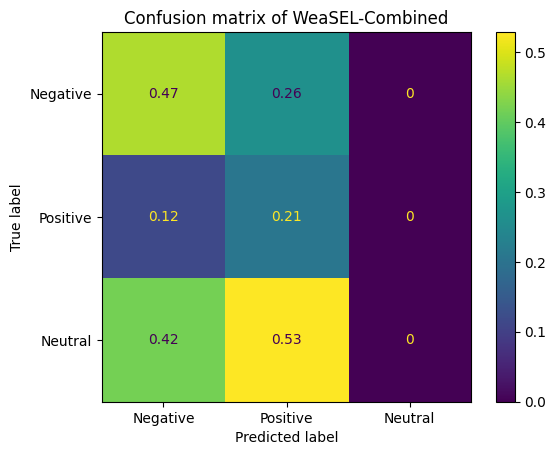

----------------------------------------------------------------------------------------------------


In [ ]:
def plot_statistics(pred_df, true_df, filename="regular"):

  plt.style.use("default")


  for model_name in model_names:
    print(model_name)
    unique, counts = np.unique(pred_df[model_name], return_counts=True)
    print(dict(zip(unique, counts)))

    print("Classification report")
    print(classification_report(true_df, pred_df[model_name], digits=4))

    print("Confusion matrix")
    cm = confusion_matrix(true_df, pred_df[model_name], labels=[0, 1, 2], normalize='pred')
    print(cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=["Negative","Positive","Neutral"])

    #plt.style.use("seaborn")
    #plt.grid('off')
    disp.plot()
    plt.title(f"Confusion matrix of {model_name}")
    plt.savefig(f'figures/{model_name}-{filename}.png')
    plt.show()
    

    print("-"*100)

plot_statistics(predictions_df, goldens)

### Statistics and plots with ambiguous texts removed

Supervised-Valence
{0: 17, 1: 3, 2: 50}
Classification report
              precision    recall  f1-score   support

           0     0.5294    0.4286    0.4737        21
           1     0.6667    0.2000    0.3077        10
           2     0.6800    0.8718    0.7640        39

    accuracy                         0.6429        70
   macro avg     0.6254    0.5001    0.5151        70
weighted avg     0.6329    0.6429    0.6117        70

Confusion matrix
[[0.52941176 0.33333333 0.22      ]
 [0.17647059 0.66666667 0.1       ]
 [0.29411765 0.         0.68      ]]


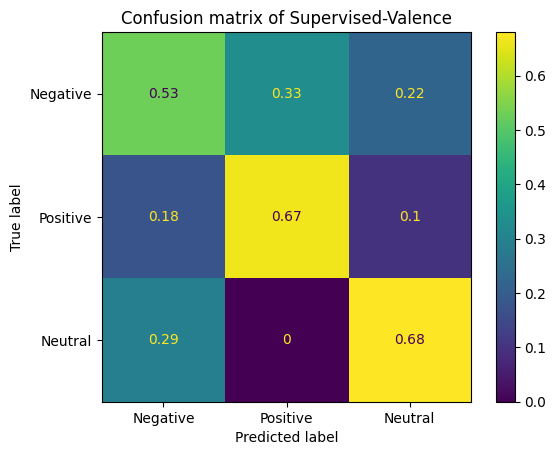

----------------------------------------------------------------------------------------------------
BERT-Valence
{0: 35, 1: 15, 2: 20}
Classification report
              precision    recall  f1-score   support

           0     0.3143    0.5238    0.3929        21
           1     0.1333    0.2000    0.1600        10
           2     0.6000    0.3077    0.4068        39

    accuracy                         0.3571        70
   macro avg     0.3492    0.3438    0.3199        70
weighted avg     0.4476    0.3571    0.3673        70

Confusion matrix
[[0.31428571 0.33333333 0.25      ]
 [0.14285714 0.13333333 0.15      ]
 [0.54285714 0.53333333 0.6       ]]


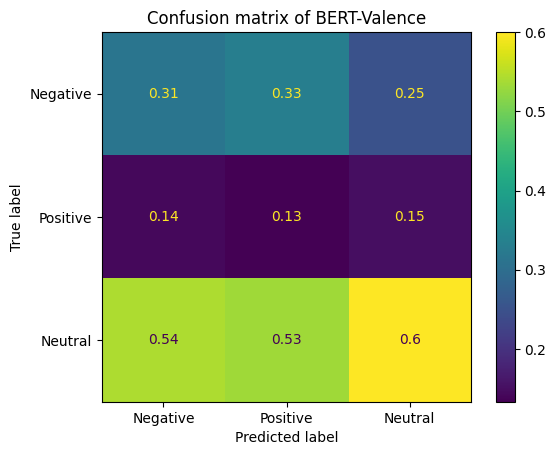

----------------------------------------------------------------------------------------------------
BERT-Combined
{0: 34, 1: 26, 2: 10}
Classification report
              precision    recall  f1-score   support

           0     0.2941    0.4762    0.3636        21
           1     0.0769    0.2000    0.1111        10
           2     0.7000    0.1795    0.2857        39

    accuracy                         0.2714        70
   macro avg     0.3570    0.2852    0.2535        70
weighted avg     0.4892    0.2714    0.2841        70

Confusion matrix
[[0.29411765 0.30769231 0.3       ]
 [0.23529412 0.07692308 0.        ]
 [0.47058824 0.61538462 0.7       ]]


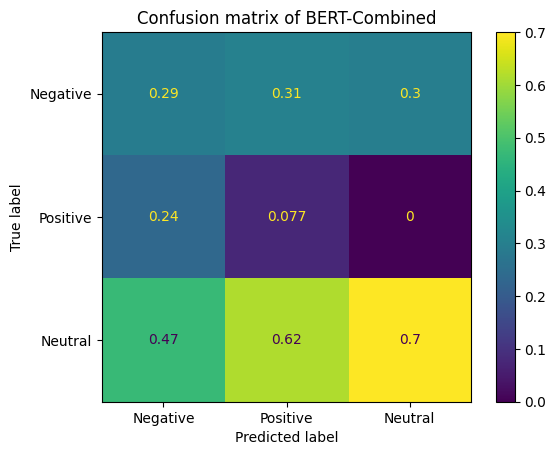

----------------------------------------------------------------------------------------------------
COSINE-Valence
{0: 9, 1: 28, 2: 33}
Classification report
              precision    recall  f1-score   support

           0     0.4444    0.1905    0.2667        21
           1     0.0357    0.1000    0.0526        10
           2     0.6061    0.5128    0.5556        39

    accuracy                         0.3571        70
   macro avg     0.3621    0.2678    0.2916        70
weighted avg     0.4761    0.3571    0.3970        70

Confusion matrix
[[0.44444444 0.35714286 0.21212121]
 [0.33333333 0.03571429 0.18181818]
 [0.22222222 0.60714286 0.60606061]]


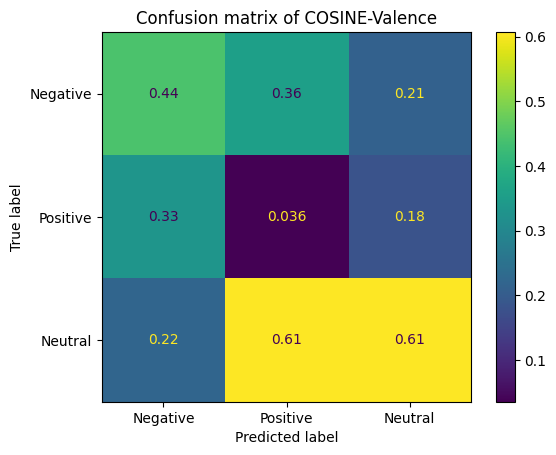

----------------------------------------------------------------------------------------------------
COSINE-Combined
{0: 14, 1: 14, 2: 42}
Classification report
              precision    recall  f1-score   support

           0     0.4286    0.2857    0.3429        21
           1     0.2143    0.3000    0.2500        10
           2     0.6667    0.7179    0.6914        39

    accuracy                         0.5286        70
   macro avg     0.4365    0.4346    0.4281        70
weighted avg     0.5306    0.5286    0.5238        70

Confusion matrix
[[0.42857143 0.42857143 0.21428571]
 [0.14285714 0.21428571 0.11904762]
 [0.42857143 0.35714286 0.66666667]]


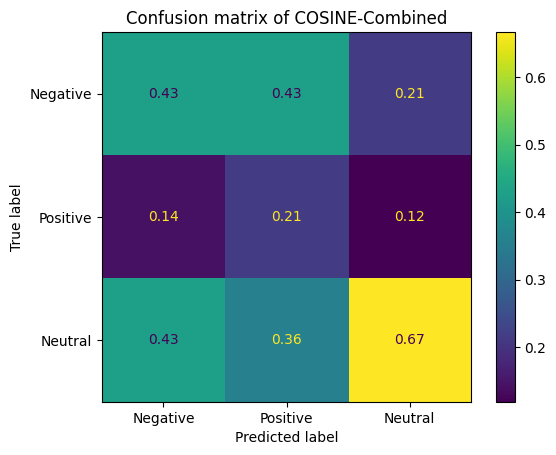

----------------------------------------------------------------------------------------------------
WeaSEL-Valence
{0: 25, 1: 45}
Classification report
              precision    recall  f1-score   support

           0     0.3200    0.3810    0.3478        21
           1     0.1778    0.8000    0.2909        10
           2     0.0000    0.0000    0.0000        39

    accuracy                         0.2286        70
   macro avg     0.1659    0.3937    0.2129        70
weighted avg     0.1214    0.2286    0.1459        70

Confusion matrix
[[0.32       0.28888889 0.        ]
 [0.08       0.17777778 0.        ]
 [0.6        0.53333333 0.        ]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


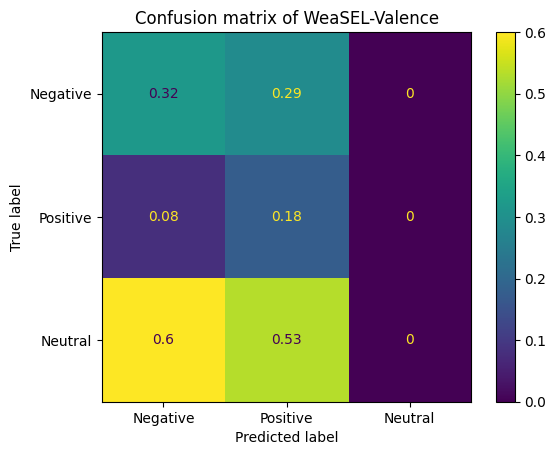

----------------------------------------------------------------------------------------------------
WeaSEL-Combined
{0: 28, 1: 42}
Classification report
              precision    recall  f1-score   support

           0     0.4286    0.5714    0.4898        21
           1     0.1905    0.8000    0.3077        10
           2     0.0000    0.0000    0.0000        39

    accuracy                         0.2857        70
   macro avg     0.2063    0.4571    0.2658        70
weighted avg     0.1558    0.2857    0.1909        70

Confusion matrix
[[0.42857143 0.21428571 0.        ]
 [0.07142857 0.19047619 0.        ]
 [0.5        0.5952381  0.        ]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


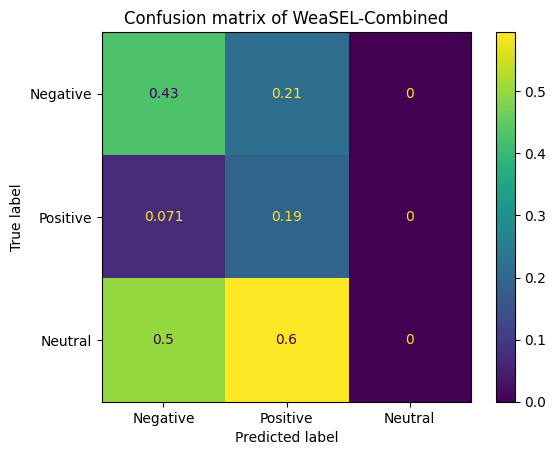

----------------------------------------------------------------------------------------------------


In [ ]:
plot_statistics(predictions_df_no_ambiguous, goldens_no_ambiguous, "no-ambiguous")

In [ ]:
!zip -r figures.zip figures/

  adding: figures/ (stored 0%)
  adding: figures/COSINE-Valence-regular.png (deflated 11%)
  adding: figures/BERT-Combined-regular.png (deflated 10%)
  adding: figures/COSINE-Valence-no-ambiguous.png (deflated 10%)
  adding: figures/WeaSEL-Combined-no-ambiguous.png (deflated 11%)
  adding: figures/COSINE-Combined-no-ambiguous.png (deflated 11%)
  adding: figures/WeaSEL-Valence-no-ambiguous.png (deflated 10%)
  adding: figures/Supervised-Valence-no-ambiguous.png (deflated 10%)
  adding: figures/WeaSEL-Valence-regular.png (deflated 11%)
  adding: figures/WeaSEL-Combined-regular.png (deflated 11%)
  adding: figures/BERT-Valence-regular.png (deflated 10%)
  adding: figures/BERT-Valence-no-ambiguous.png (deflated 10%)
  adding: figures/COSINE-Combined-regular.png (deflated 10%)
  adding: figures/BERT-Combined-no-ambiguous.png (deflated 11%)
  adding: figures/Supervised-Valence-regular.png (deflated 11%)
